# Annotations by risk scores sourcing data from files

## Read risk scores

In [2]:
import os

import pandas as pd


predictionsDir = os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/predictions'

predictionsDfList = []
for mortality in [7, 14, 30]:
    for wa in [1, 2, 3]:
        predictionsFile = predictionsDir + '/wb_365_wa_' + str(wa) + '/' + str(mortality) + '_day_mortality_normal.csv'
        tempDf = pd.read_csv(predictionsFile)
        tempDf['mortality'] = mortality
        tempDf['wa'] = wa
        predictionsDfList.append(tempDf)

predictionsDf = pd.concat(predictionsDfList, ignore_index=True)
predictionsDf

person_id  JOURNEY_ID     preds  mortality  wa
0         51211    17360979  0.032720          7   1
1         51211    17371307  0.000055          7   1
2         51211    17419909  0.000245          7   1
3         51211    17422049  0.000019          7   1
4         51211    17495894  0.000153          7   1
...         ...         ...       ...        ...  ..
8266    2678697    17471674  0.000848         30   3
8267    2679272    17485225  0.864064         30   3
8268    2680486    17502337  0.018188         30   3
8269    2682433    17536805  0.151517         30   3
8270    2684042    17565390  0.014253         30   3

[8271 rows x 5 columns]

## Read mapping information

In [7]:
import os

import pandas as pd


demoTrainDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_train.csv', sep='\t')
demoTestDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_test.csv', sep='\t')
demoValidateDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_validate.csv', sep='\t')
demoDf = pd.concat([demoTrainDf, demoTestDf, demoValidateDf], ignore_index=True)
demoDf

person_id  visit_occurrence_id       TYPE COUNTRY_OF_BIRTH     SEX  \
0        678487              3312694  Emergency        Australia    Male   
1       2094045              9199249  Emergency        Australia    Male   
2       2107813              9410987  Emergency        Australia    Male   
3       2083212               602890  Inpatient        Australia  Female   
4       2083212              9039437  Emergency        Australia  Female   
...         ...                  ...        ...              ...     ...   
7194    2603535             16588204  Inpatient        Australia    Male   
7195    2603535             16709341  Inpatient        Australia    Male   
7196    2603535             16651755  Inpatient        Australia    Male   
7197    2098616             16872774  Emergency        Australia  Female   
7198    2098616             16869916  Emergency        Australia  Female   

       Age_Bin  JOURNEY_ID  
0     (60, 70]     3312694  
1     (20, 30]     9199249  
2     (50, 60]     9410987  
3     (40, 50]     9039437  
4     (40, 50]     9039437  
...        ...         ...  
7194  (60, 70]    16588204  
7195  (60, 70]    16709341  
7196  (60, 70]    16651755  
7197  (80, 90]    16872774  
7198  (80, 90]    16869916  

[7199 rows x 7 columns]

In [ ]:
import os


mappingDf = pd.read_csv(os.environ['GENOMICS_DATA_BASE'] + '/patient_tube_id_mapping_full.tsv', sep='\t')
mappingDf

tube_code  PATIENT_ID  db_ID  pt_age pt_gender  EPISODE_ID  \
0      AH19J072    213972.0  3JNQS      64      Male  12931474.0   
1      AH19J074    213972.0  3JNQS      64      Male  12931474.0   
2      AH19B003    526238.0  567AE      85      Male    640261.0   
3      AH20A024    788941.0  3YBDS      58    Female  13194824.0   
4      AH20L041   1023735.0  2VJ78      42      Male  14210147.0   
...         ...         ...    ...     ...       ...         ...   
3112  ALF22L076    639020.0  3S6HL      84      Male  17219899.0   
3113  ALF22L089    655404.0  6EWBM      67    Female         NaN   
3114  ALF22L138   2572048.0  YM5PJ      61      Male         NaN   
3115  ALF23A102   2054964.0  5DYAH      35    Female  17294287.0   
3116  ALF23B102   2015952.0  57E2W      82    Female  17281239.0   

     hospital_admission hospital_discharge hospital_in_last_year  \
0            2019-10-17         2019-11-29                   yes   
1            2019-10-17         2019-11-29                   yes   
2            2019-02-04         2019-02-07                    no   
3            2020-01-16         2020-01-19                    no   
4            2020-12-18         2021-01-05                   yes   
...                 ...                ...                   ...   
3112         2022-12-15         2022-12-20                   yes   
3113                NaN                NaN                   NaN   
3114                NaN                NaN                   NaN   
3115         2023-01-12         2023-02-01                   yes   
3116         2023-01-08         2023-02-16                    no   

                        genome_species                species_reported  \
0                     Escherichia coli                Escherichia coli   
1                Streptococcus sp. D19       Streptococcus mitis group   
2                     Escherichia coli                Escherichia coli   
3                     Escherichia coli                Escherichia coli   
4                Staphylococcus aureus           Staphylococcus aureus   
...                                ...                             ...   
3112        Streptococcus vestibularis  Streptococcus salivarius group   
3113                  Proteus columbae                Proteus vulgaris   
3114         Enterobacter roggenkampii    Enterobacter cloacae complex   
3115        Streptococcus constellatus   Streptococcus anginosus group   
3116  Acinetobacter colistiniresistens           Acinetobacter species   

      contig_number   length tube_code_duplicate_or_old date_of_collection  \
0                92  5131021                        NaN         2019-10-30   
1                84  2022991                        NaN         2019-10-30   
2                93  4942915                        NaN         2019-02-03   
3               110  5149157                        NaN         2020-01-16   
4                46  2735216                        NaN         2020-12-16   
...             ...      ...                        ...                ...   
3112            107  1938627                        NaN         2022-12-15   
3113            152  3972219                        NaN         2022-12-17   
3114             66  4876179                        NaN         2022-12-27   
3115             54  1869828                        NaN         2023-01-11   
3116            233  3952992                        NaN         2023-02-15   

        ID_number location_additional_02 collected_from_original  
0     19-303-0997             A-7EA;HAEM                   Blood  
1     19-303-1174             A-7EA;HAEM        Blood Peripheral  
2     19-034-1596              A-4WB;GMC                   Blood  
3     20-016-2112         S-ED;Emergency            Blood Venous  
4     20-351-2856     Emergency Dept;nan                   Blood  
...           ...                    ...                     ...  
3112  22-349-2150               Ward 4WB        Blood Peripheral  
3113  22-3

In [9]:
mappedJourneyTubeIdsDf = mappingDf[['tube_code', 'PATIENT_ID', 'EPISODE_ID']].drop_duplicates().merge(
    demoDf[['person_id', 'visit_occurrence_id', 'JOURNEY_ID']],
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(
    columns=['PATIENT_ID', 'EPISODE_ID', 'visit_occurrence_id']
)[['person_id', 'JOURNEY_ID', 'tube_code']].drop_duplicates()
mappedJourneyTubeIdsDf

person_id  JOURNEY_ID  tube_code
0        50056    13224842   AH20B011
1        62567    12645629   AH19G065
2       138108    14737781   AH21E052
3       211314    13955099   AH20J009
4       211314    13955099    KPN2214
..         ...         ...        ...
512    2677962    17459522  ALF23C220
513    2684042    17565390  ALF23D001
514    2207334    15581117   AH21J066
515    2638484    16969999  ALF22K143
516    2015952    17281239  ALF23B102

[517 rows x 3 columns]

In [12]:
mergedDf = predictionsDf.merge(
    mappedJourneyTubeIdsDf,
    how='inner',
    on=['person_id', 'JOURNEY_ID']
)
mergedDf

person_id  JOURNEY_ID     preds  mortality  wa  tube_code
0        138004    17354479  0.005408          7   1  ALF23C052
1        138004    17354479  0.010567          7   2  ALF23C052
2        138004    17354479  0.006408          7   3  ALF23C052
3        138004    17354479  0.031596         14   1  ALF23C052
4        138004    17354479  0.088641         14   2  ALF23C052
...         ...         ...       ...        ...  ..        ...
1051    2684042    17565390  0.002694         30   2  ALF23D001
1052    2684042    17565390  0.014253         30   3  ALF23D001
1053    2571565    16045917  0.019733          7   3  ALF22E058
1054    2571565    16045917  0.002638         14   3  ALF22E058
1055    2571565    16045917  0.000863         30   3  ALF22E058

[1056 rows x 6 columns]

## Read annotations

In [78]:
gff3DfList = []
for i, row in mergedDf.iterrows():
    fileName = os.environ['GENOMICS_DATA_BASE'] + '/annotations/s_aureus_gff3/' + row.tube_code + '.gff3'
    if(os.path.isfile(fileName)):
        gff3Df = pd.read_csv(
            fileName,
            comment='#',
            sep='\t',
            names=['sequence_id', 'source', 'feature_type', 'feature_start', 'feature_end', 'score', 'strand', 'phase', 'atributes']
        )
        gff3Df['id'] = gff3Df.atributes.apply(lambda x: [att.split('=')[1] for att in x.split(';') if att.split('=')[0] == 'ID']).apply(lambda x: None if (len(x) == 0) else x[0])
        gff3Df['name'] = gff3Df.atributes.apply(lambda x: [att.split('=')[1] for att in x.split(';') if att.split('=')[0] == 'Name']).apply(lambda x: None if (len(x) == 0) else x[0])
        gff3Df['gene'] = gff3Df.atributes.apply(lambda x: [att.split('=')[1] for att in x.split(';') if att.split('=')[0] == 'gene']).apply(lambda x: None if (len(x) == 0) else x[0])
        gff3Df['tube_code'] = row.tube_code
        gff3DfList.append(gff3Df)
annotationsDf = pd.concat(gff3DfList, ignore_index=True)
annotationsDf

sequence_id    source feature_type  feature_start  feature_end score  \
0                 1     Bakta       region              1      1088229     .   
1                 1  Prodigal          CDS            350         1414     .   
2                 1  Prodigal          CDS           1562         3004     .   
3                 1  Prodigal          CDS           3327         3794     .   
4                 1  Prodigal          CDS           3926         5242     .   
...             ...       ...          ...            ...          ...   ...   
425137           32     Bakta       region              1          167     .   
425138           33     Bakta       region              1          163     .   
425139           34     Bakta       region              1          144     .   
425140           35     Bakta       region              1          135     .   
425141           36     Bakta       region              1          104     .   

       strand phase                                          atributes  \
0           +     .                                        ID=1;Name=1   
1           -     0  ID=ODFNLF_00005;Name=Fe-S cluster carrier ATPa...   
2           -     0  ID=ODFNLF_00010;Name=multidrug efflux MFS tran...   
3           -     0  ID=ODFNLF_00015;Name=multidrug efflux transpor...   
4           -     0  ID=ODFNLF_00020;Name=multidrug efflux MFS tran...   
...       ...   ...                                                ...   
425137      +     .                                      ID=32;Name=32   
425138      +     .                                      ID=33;Name=33   
425139      +     .                                      ID=34;Name=34   
425140      +     .                                      ID=35;Name=35   
425141      +     .                                      ID=36;Name=36   

                  id                                               name  gene  \
0                  1                                                  1  None   
1       ODFNLF_00005  Fe-S cluster carrier ATPase%2C Mrp/ApbC/NBP35 ...   mrp   
2       ODFNLF_00010              multidrug efflux MFS transporter LmrS  lmrS   
3       ODFNLF_00015                  multidrug efflux transporter SepA  sepA   
4       ODFNLF_00020              multidrug efflux MFS transporter SdrM  sdrM   
...              ...                                                ...   ...   
425137            32                                                 32  None   
425138            33                                                 33  None   
425139            34                                                 34  None   
425140            35                                                 35  None   
425141            36                                                 36  None   

        tube_code  
0       ALF22G032  
1       ALF22G032  
2       ALF22G032  
3       ALF22G032  
4       ALF22G032  
...           ...  
425137  ALF23C124  
425138  ALF23C124  
425139  ALF23C124  
425140  ALF23C124  
425141  ALF23C124  

[425142 rows x 13 columns]

In [83]:
len(annotationsDf.tube_code.unique())

17

## Merge all the data

In [79]:
finalDf = annotationsDf.merge(
    mergedDf,
    how='inner',
    on=['tube_code']
)
finalDf

sequence_id source feature_type  feature_start  feature_end score  \
0                  1  Bakta       region              1      1088229     .   
1                  1  Bakta       region              1      1088229     .   
2                  1  Bakta       region              1      1088229     .   
3                  1  Bakta       region              1      1088229     .   
4                  1  Bakta       region              1      1088229     .   
...              ...    ...          ...            ...          ...   ...   
3826273           36  Bakta       region              1          104     .   
3826274           36  Bakta       region              1          104     .   
3826275           36  Bakta       region              1          104     .   
3826276           36  Bakta       region              1          104     .   
3826277           36  Bakta       region              1          104     .   

        strand phase      atributes  id name  gene  tube_code  person_id  \
0            +     .    ID=1;Name=1   1    1  None  ALF22G032    1733673   
1            +     .    ID=1;Name=1   1    1  None  ALF22G032    1733673   
2            +     .    ID=1;Name=1   1    1  None  ALF22G032    1733673   
3            +     .    ID=1;Name=1   1    1  None  ALF22G032    1733673   
4            +     .    ID=1;Name=1   1    1  None  ALF22G032    1733673   
...        ...   ...            ...  ..  ...   ...        ...        ...   
3826273      +     .  ID=36;Name=36  36   36  None  ALF23C124    2679272   
3826274      +     .  ID=36;Name=36  36   36  None  ALF23C124    2679272   
3826275      +     .  ID=36;Name=36  36   36  None  ALF23C124    2679272   
3826276      +     .  ID=36;Name=36  36   36  None  ALF23C124    2679272   
3826277      +     .  ID=36;Name=36  36   36  None  ALF23C124    2679272   

         JOURNEY_ID     preds  mortality  wa  
0          16562760  0.000542          7   1  
1          16562760  0.000099          7   2  
2          16562760  0.001330          7   3  
3          16562760  0.000294         14   1  
4          16562760  0.002582         14   2  
...             ...       ...        ...  ..  
3826273    17485225  0.021166         14   2  
3826274    17485225  0.453465         14   3  
3826275    17485225  0.961186         30   1  
3826276    17485225  0.057026         30   2  
3826277    17485225  0.864064         30   3  

[3826278 rows x 18 columns]

## Plot

In [80]:
finalDf[['sequence_id', 'feature_type', 'source']].groupby(by=['feature_type', 'source']).agg('count')

sequence_id
feature_type      source                  
CDS               Bakta              21060
                  Prodigal         3496770
ncRNA             Infernal          110565
oriC              BLAST+              3483
oriT              BLAST+              1053
rRNA              Infernal            5346
region            Bakta              70227
regulatory_region Infernal           34506
tRNA              tRNAscan-SE        81891
tmRNA             Aragorn             1377

### Plot for high risk scores

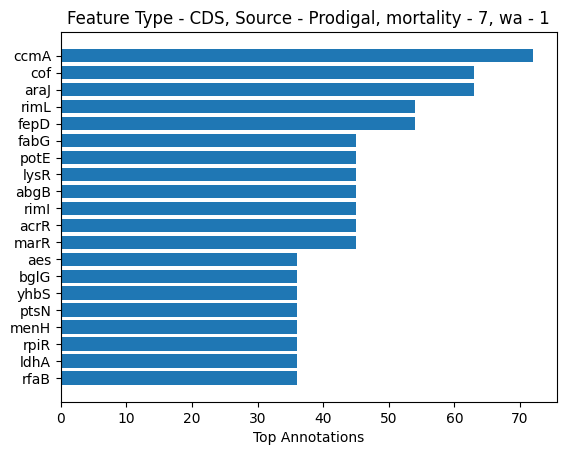

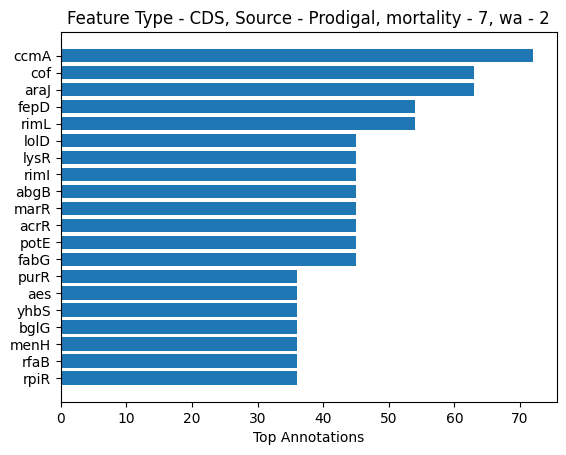

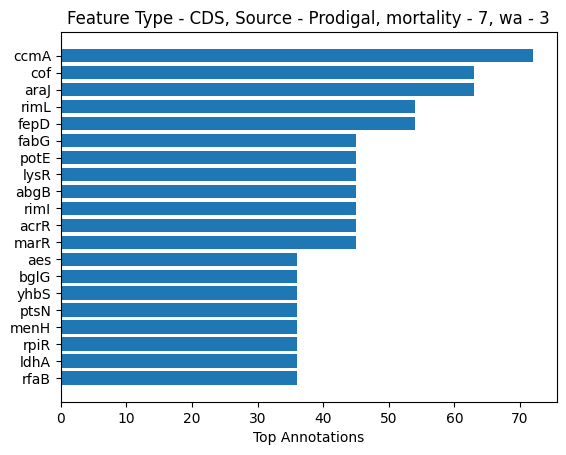

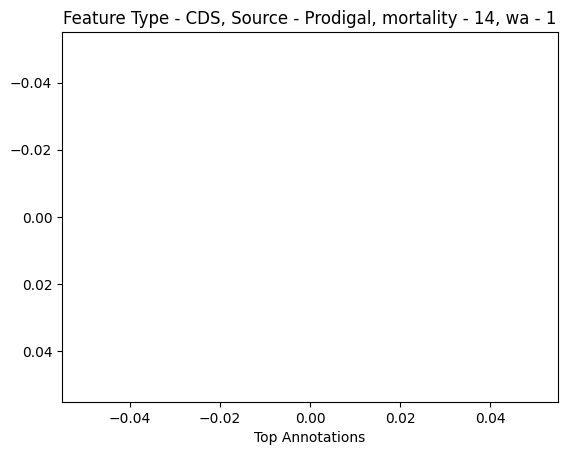

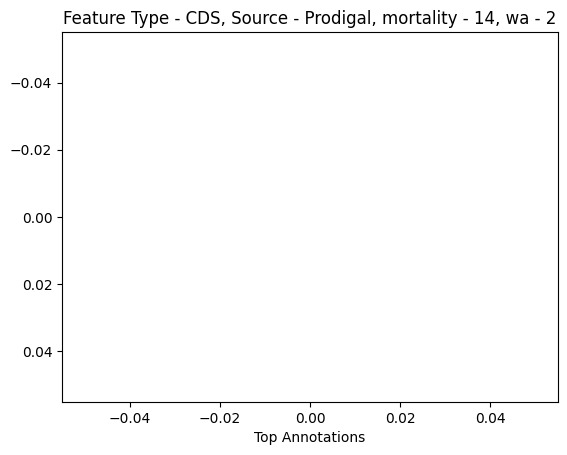

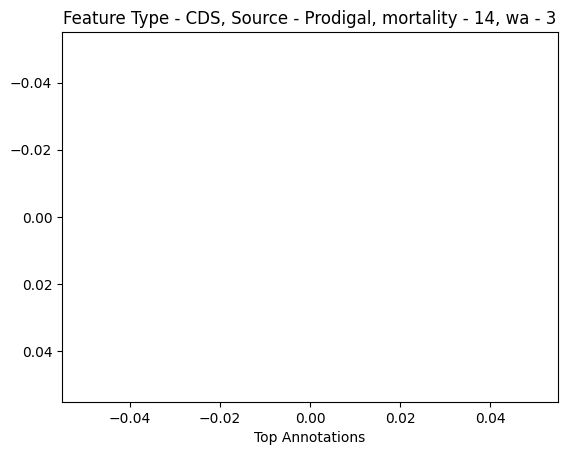

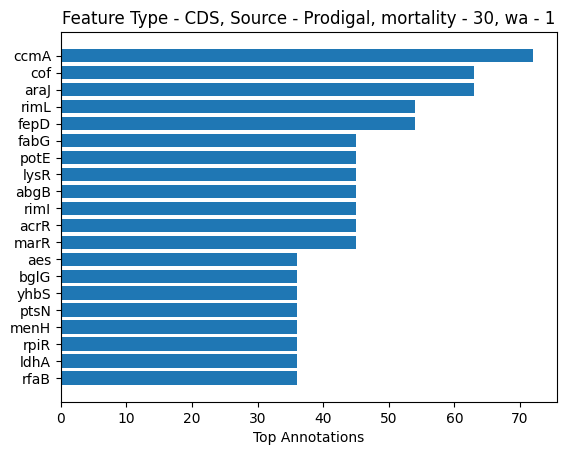

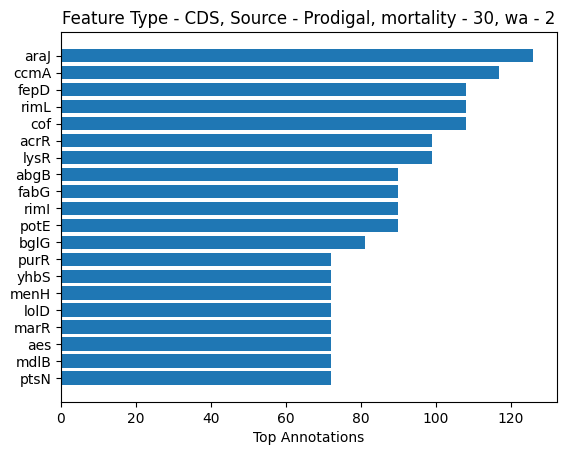

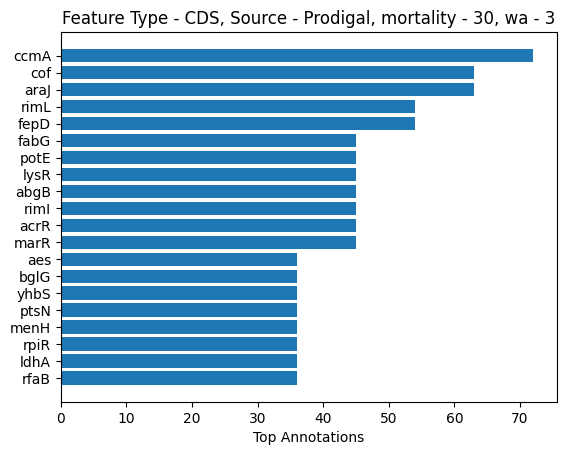

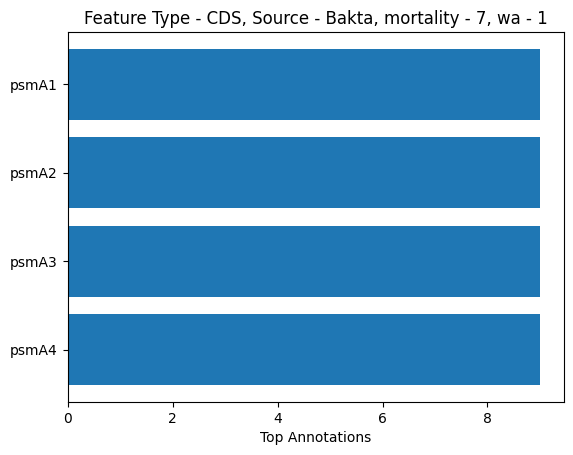

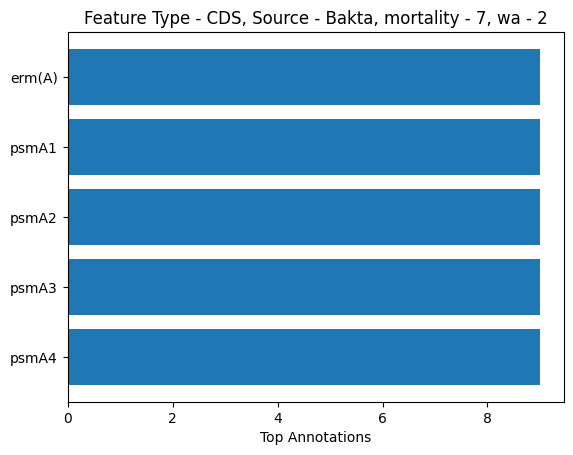

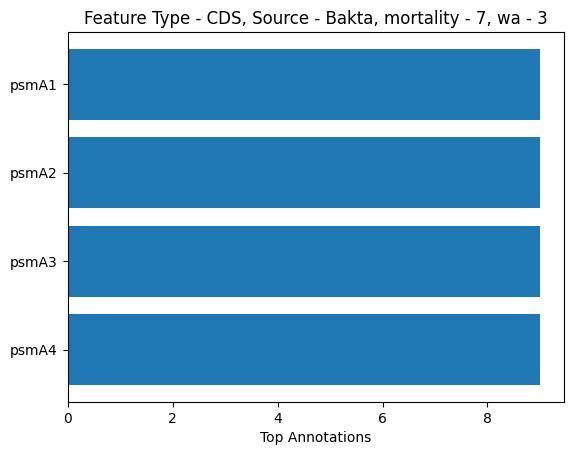

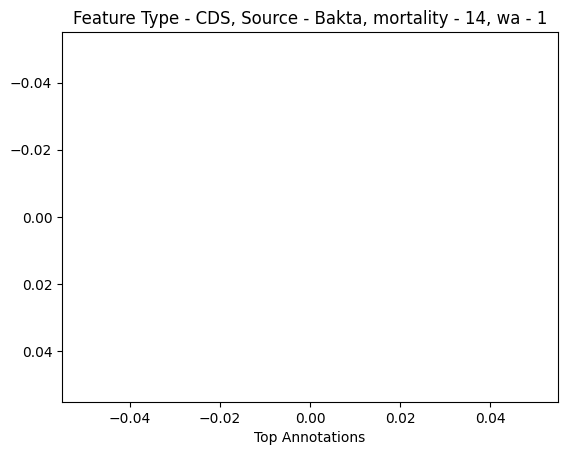

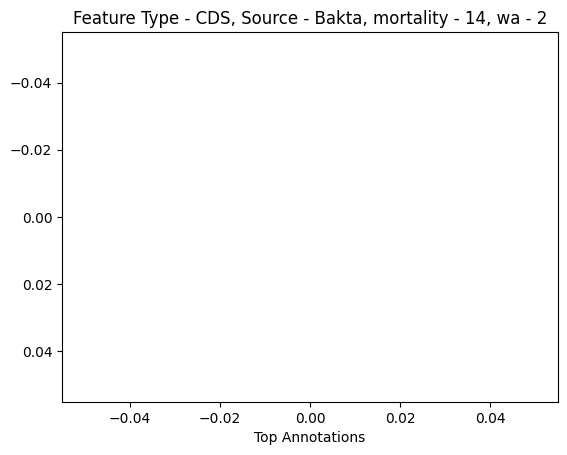

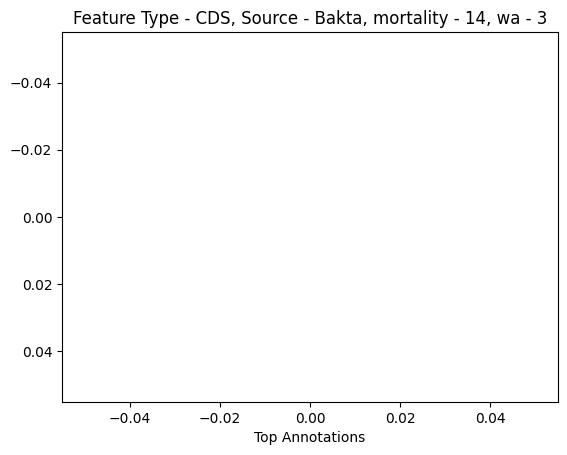

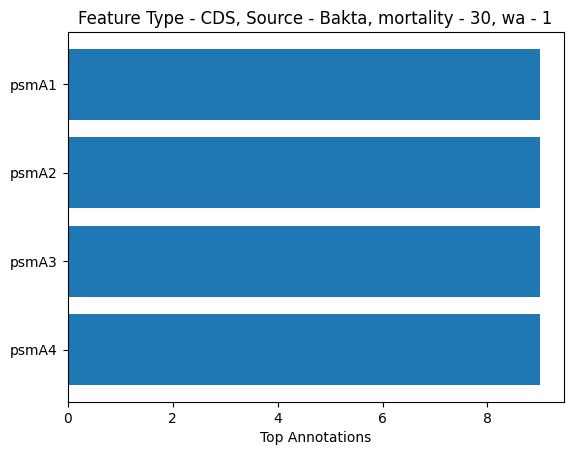

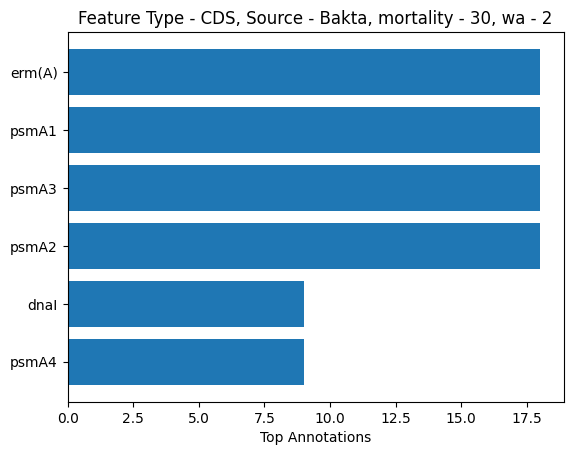

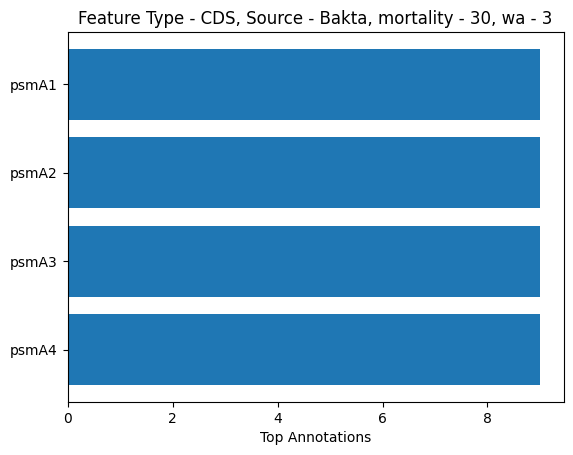

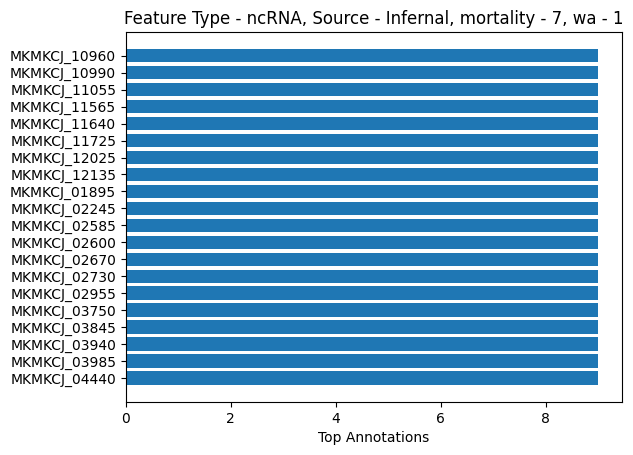

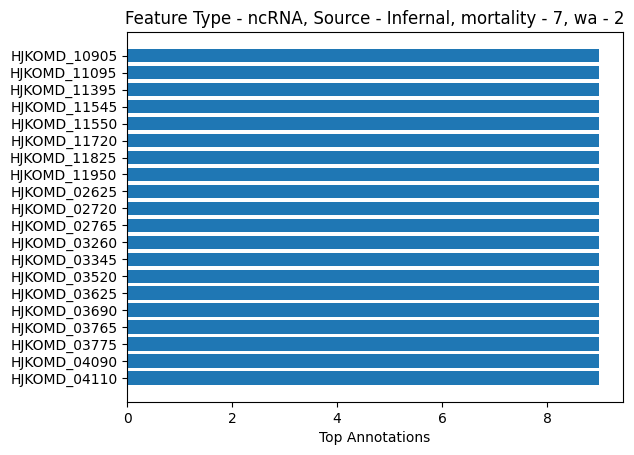

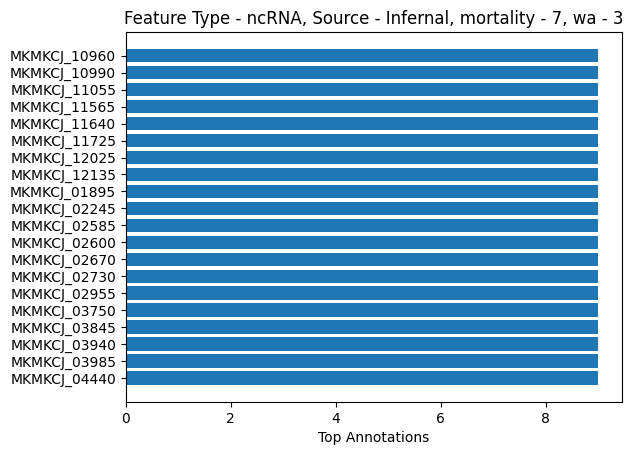

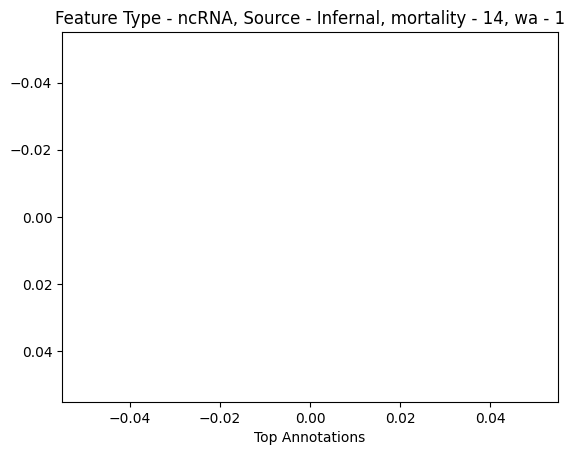

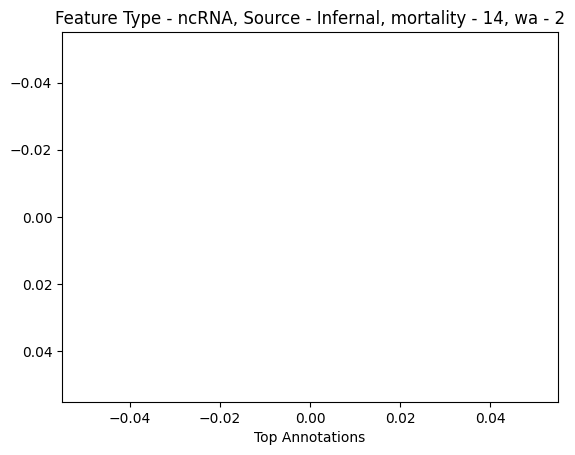

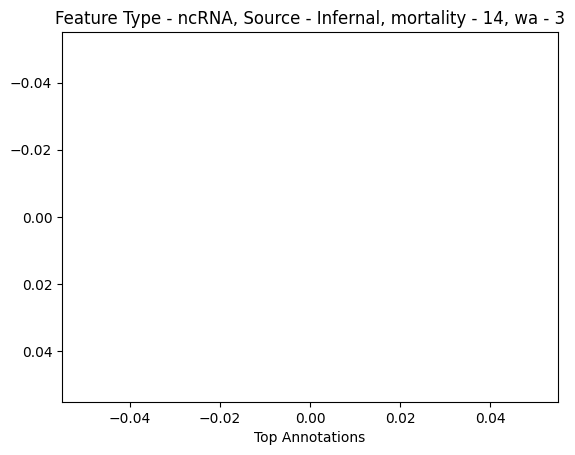

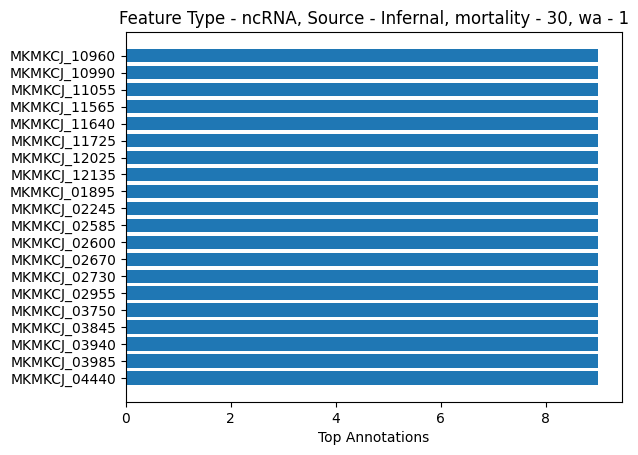

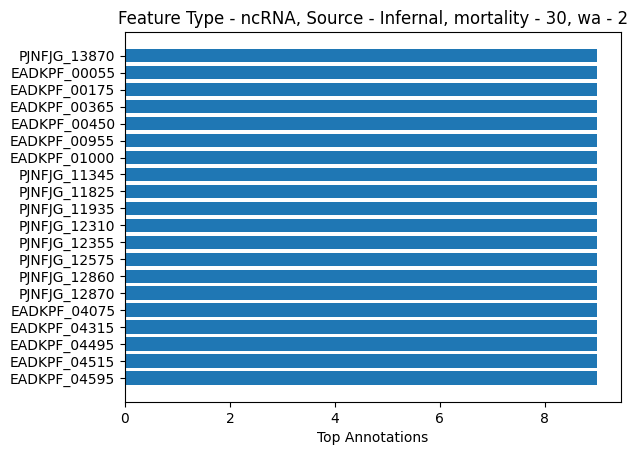

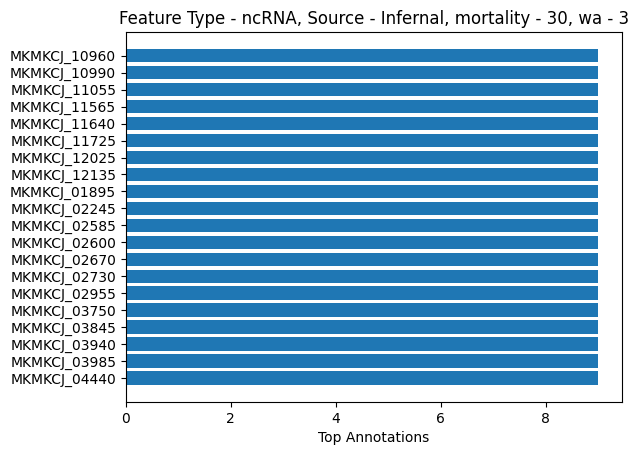

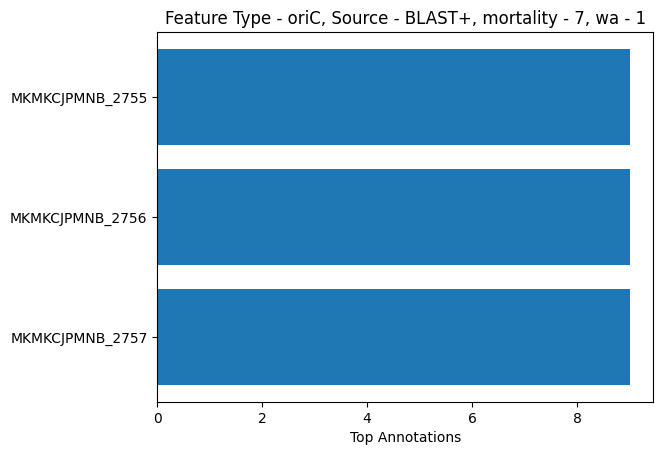

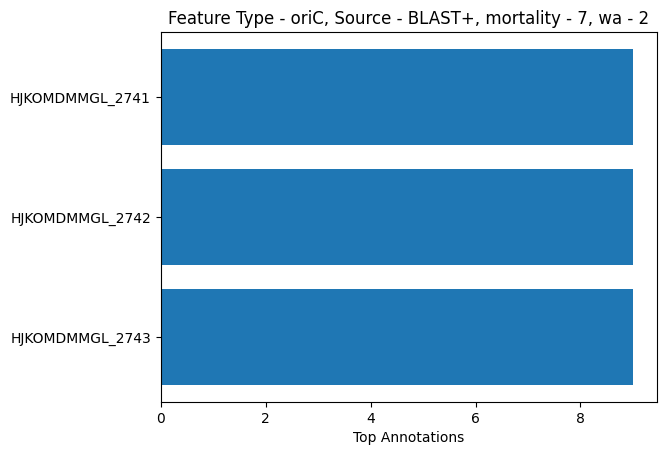

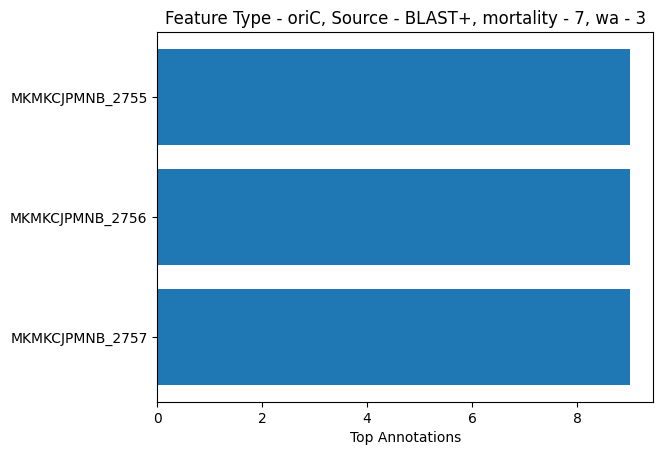

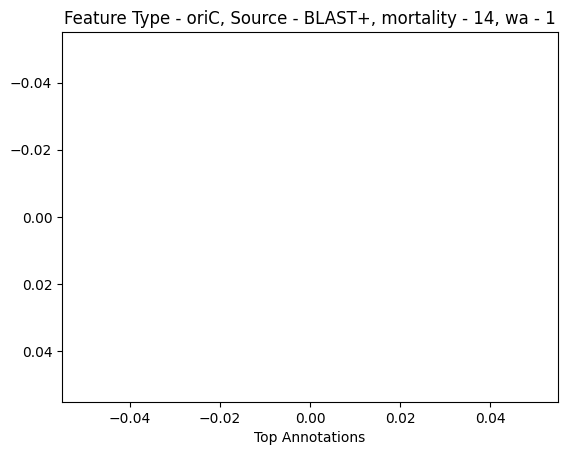

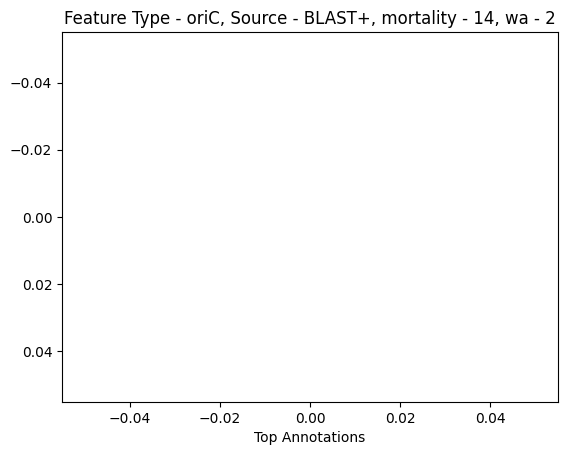

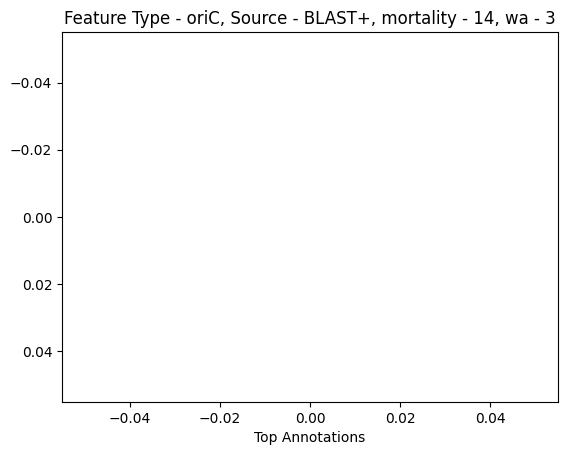

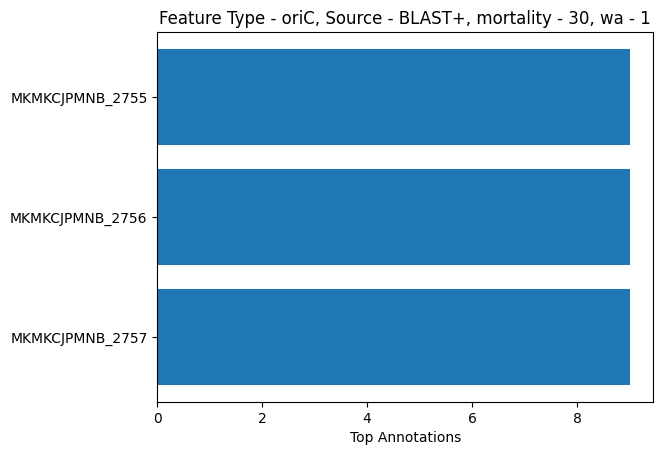

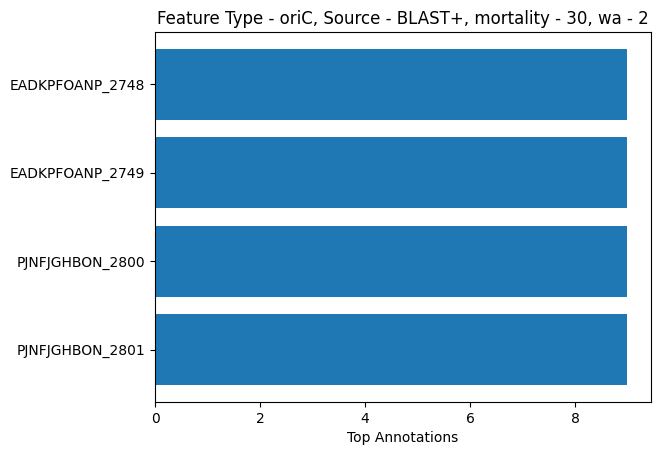

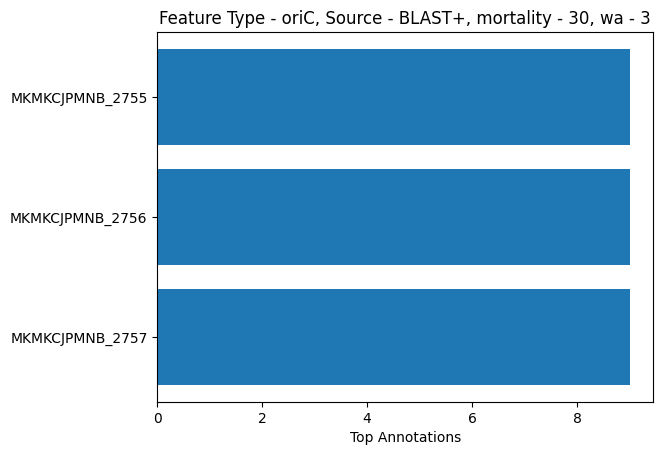

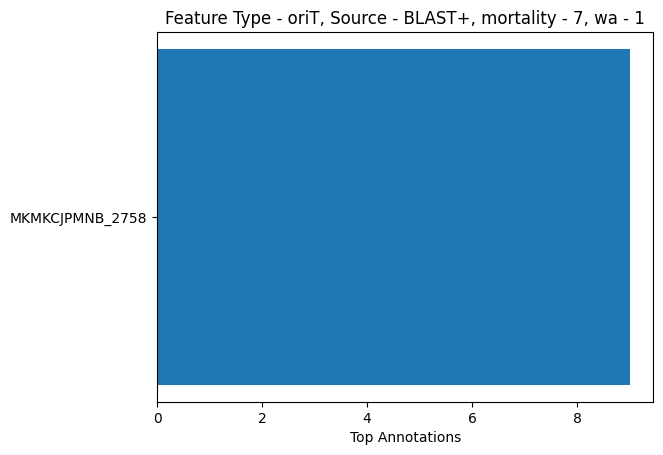

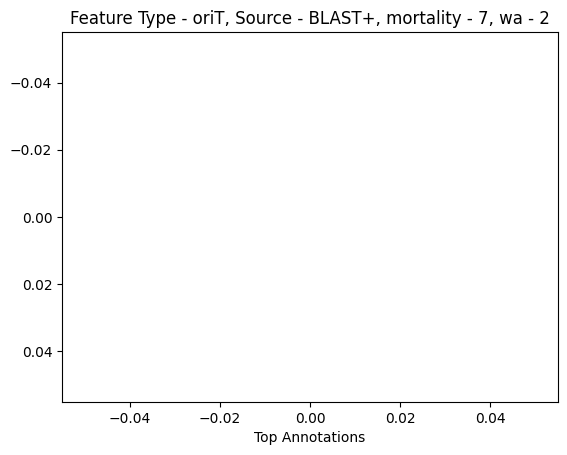

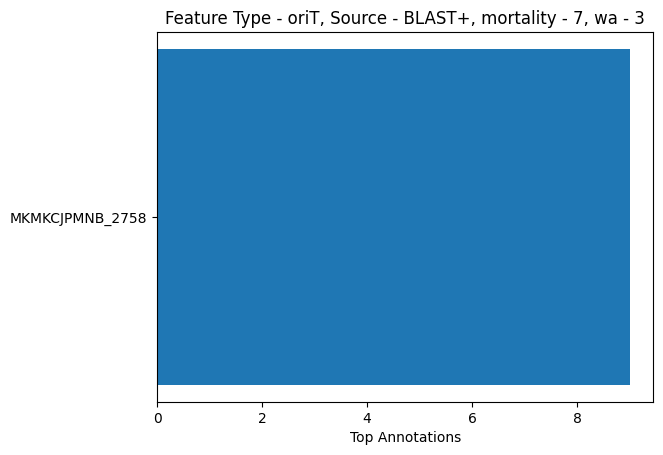

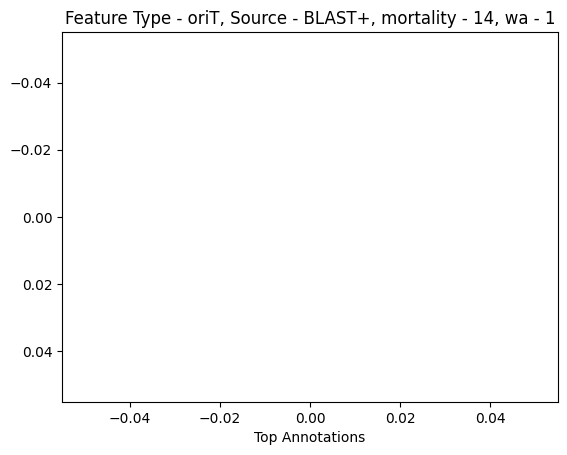

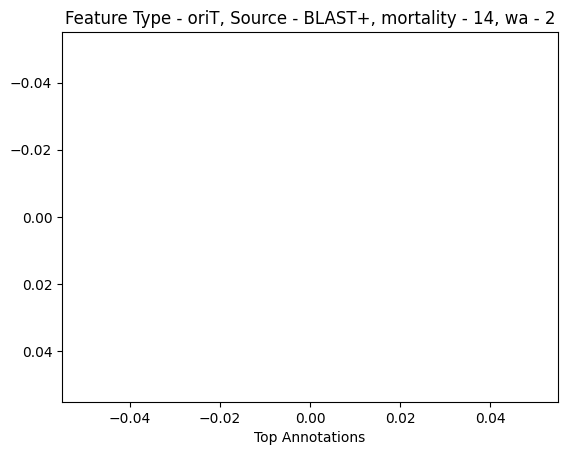

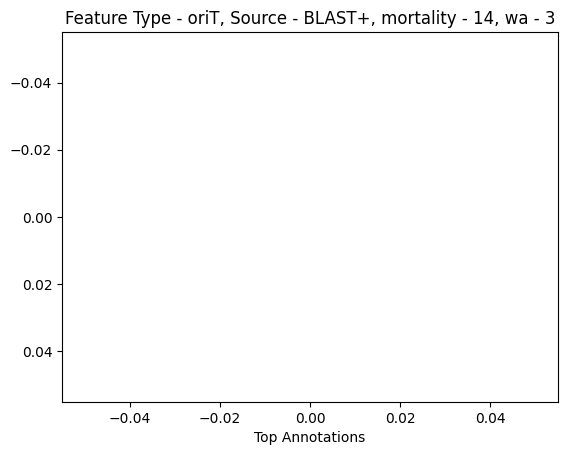

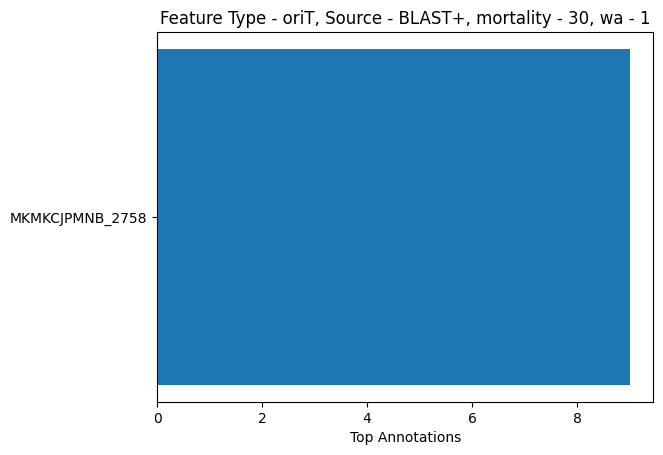

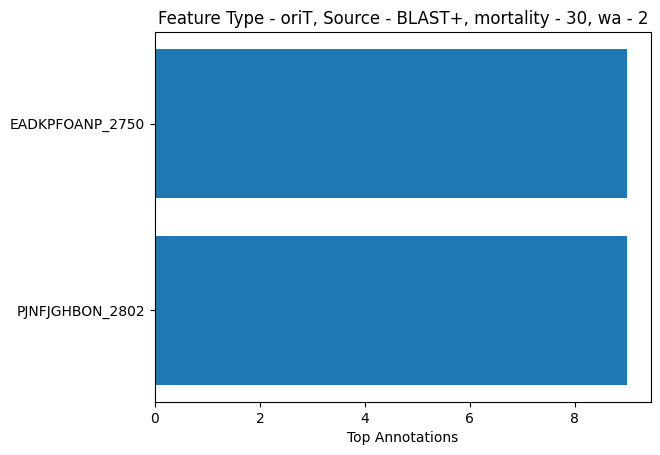

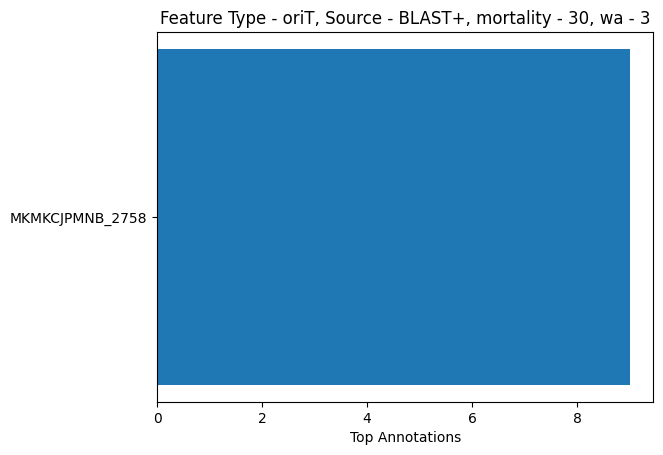

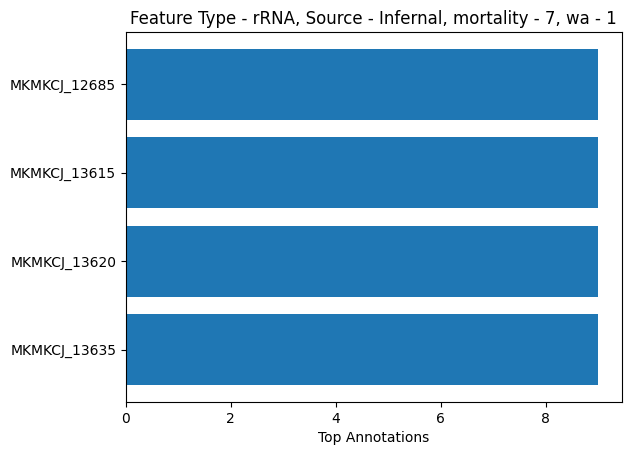

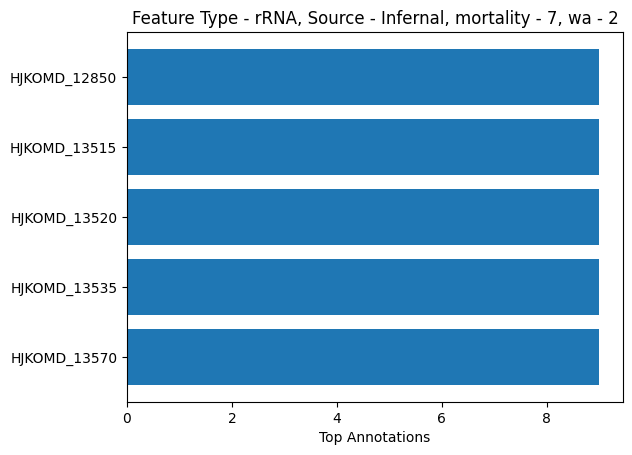

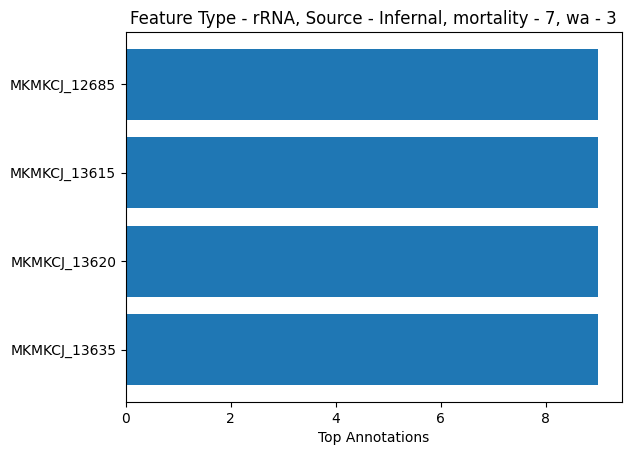

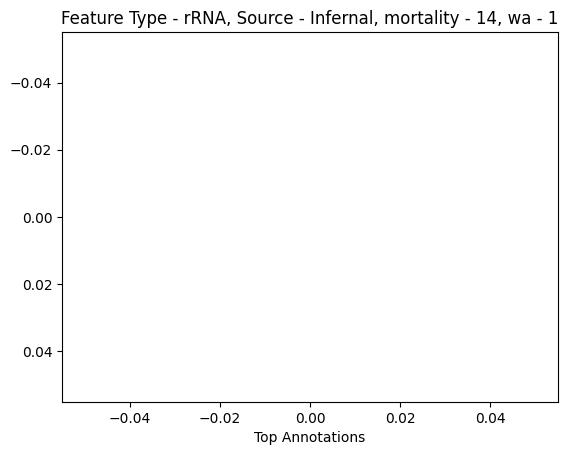

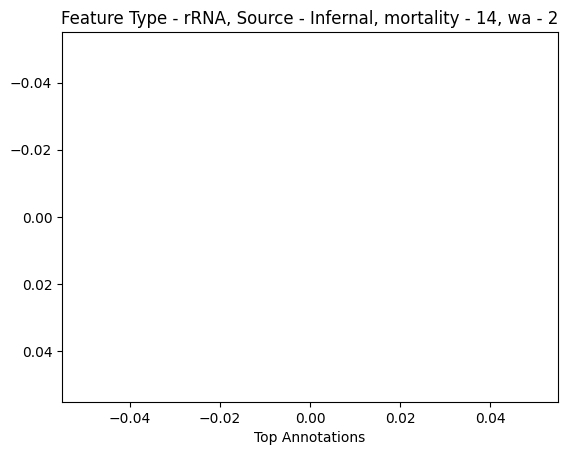

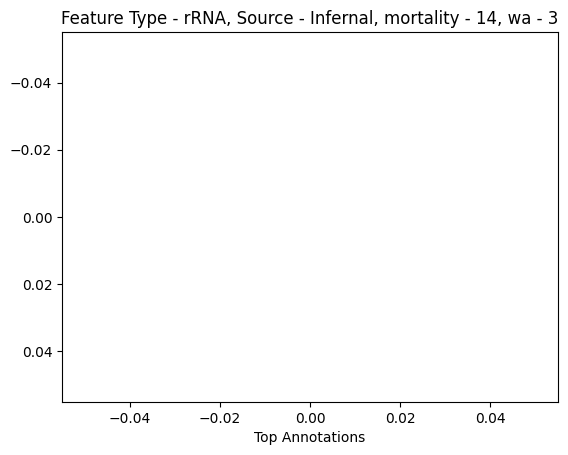

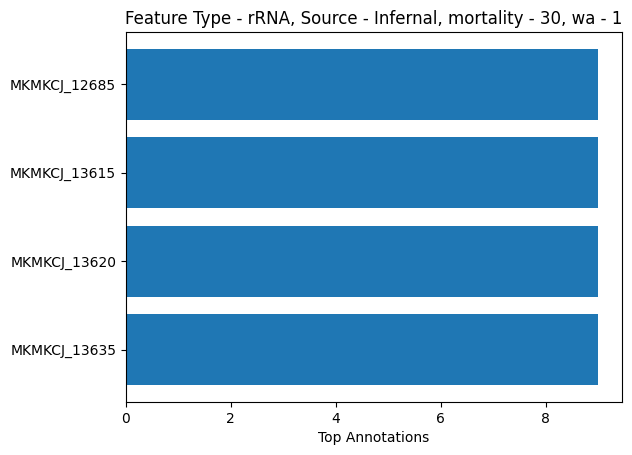

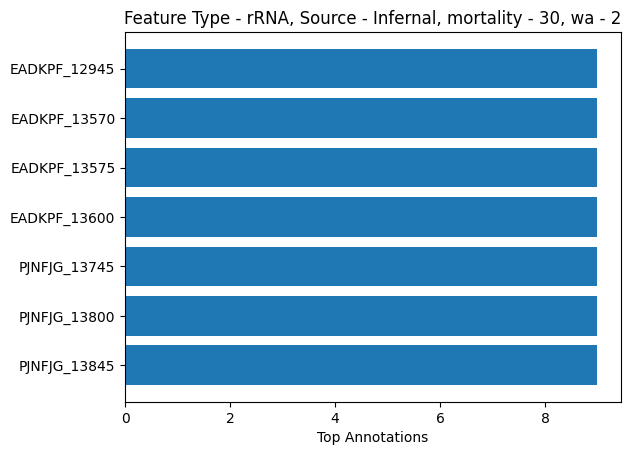

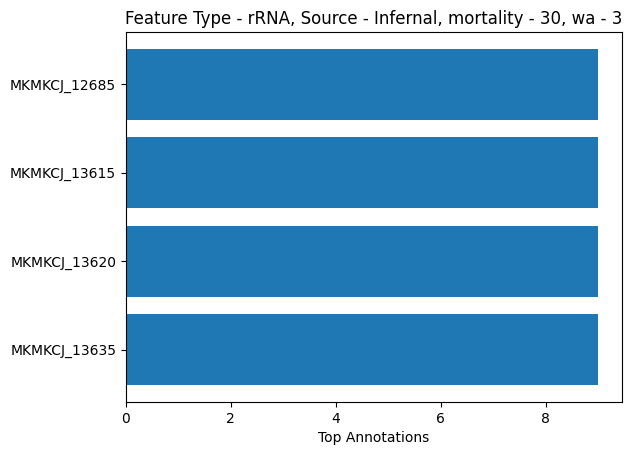

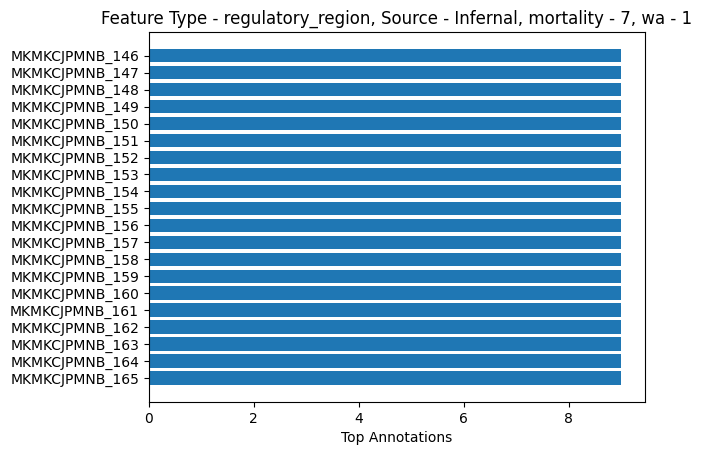

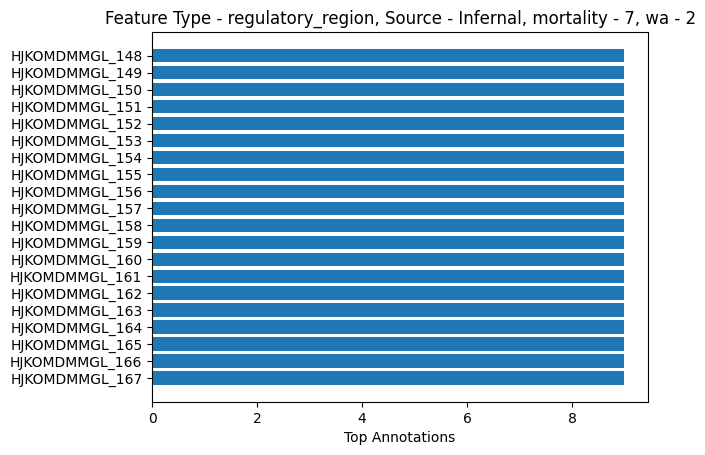

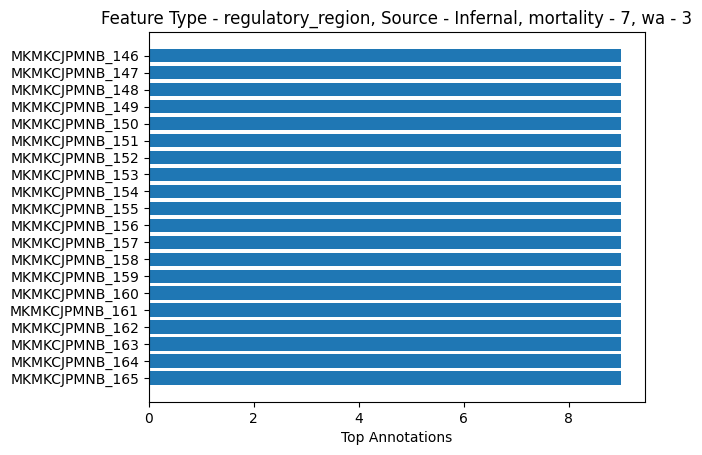

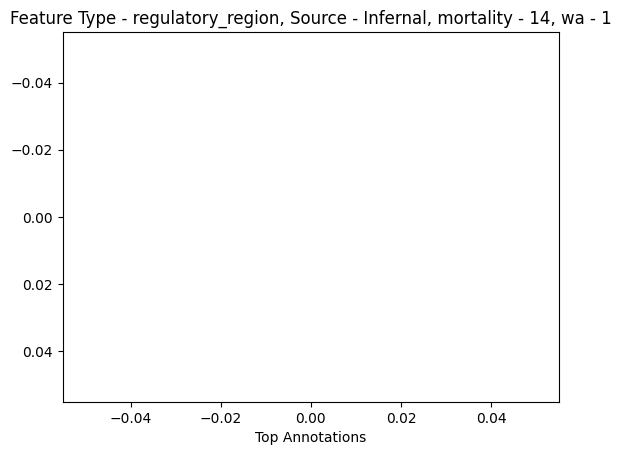

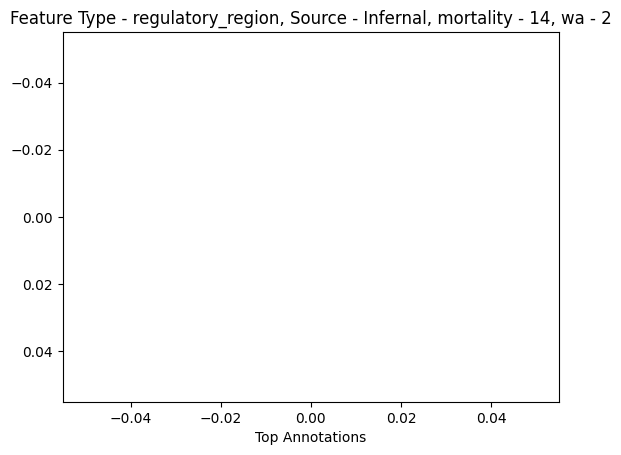

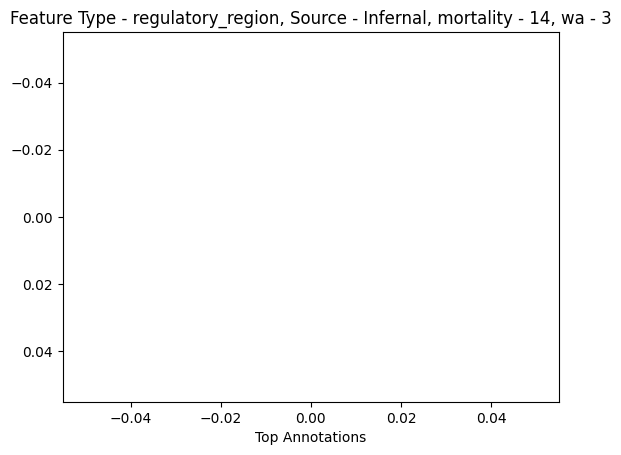

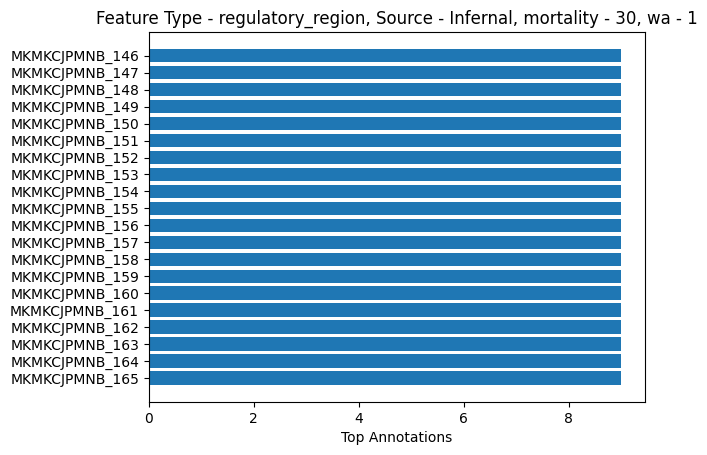

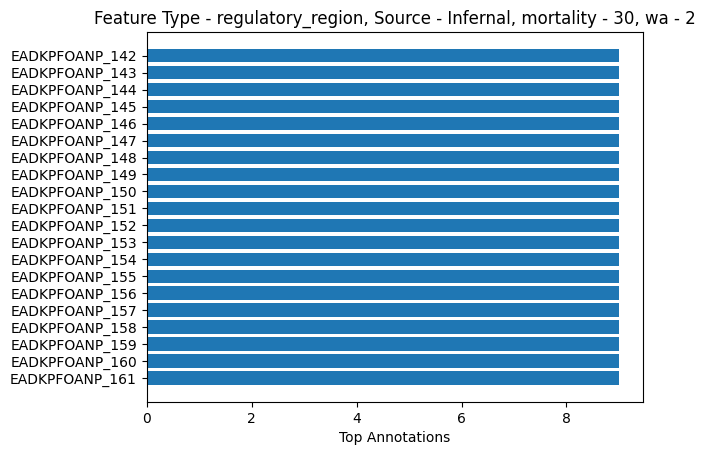

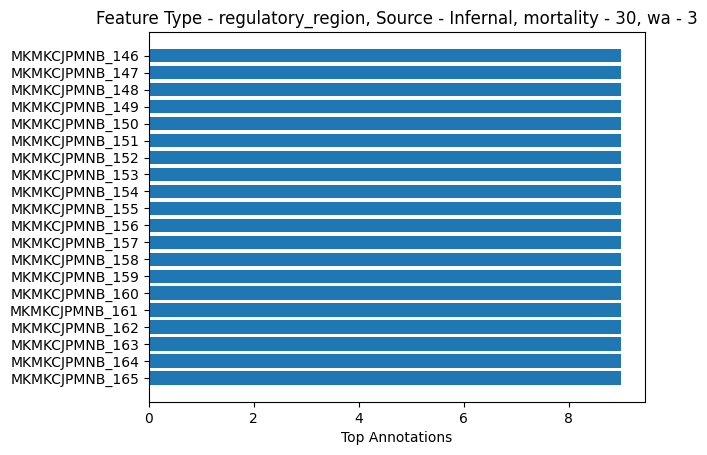

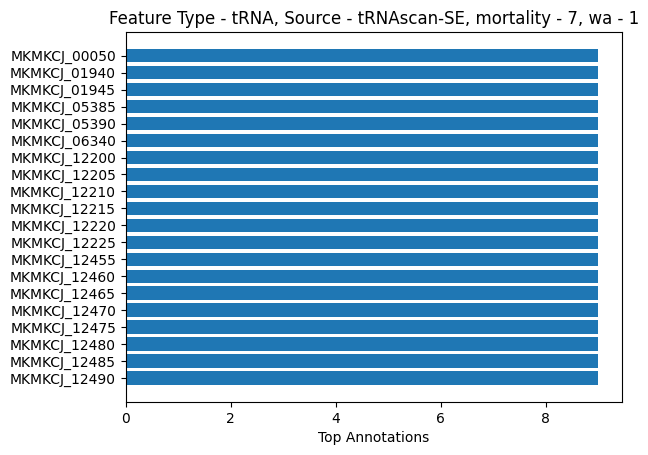

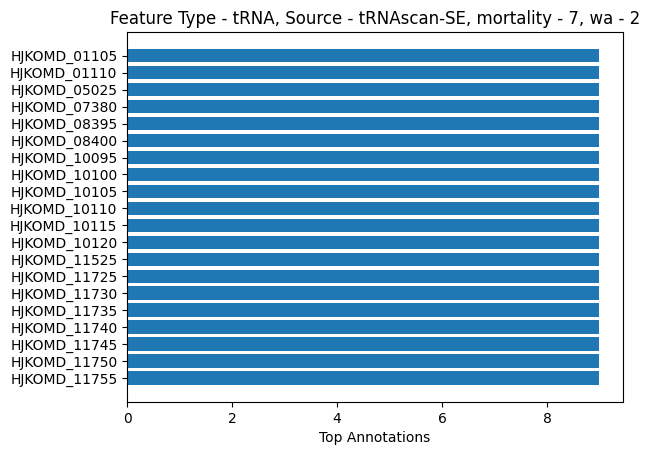

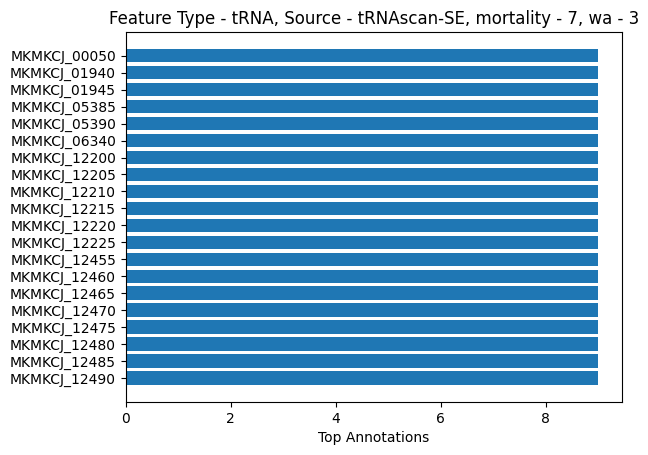

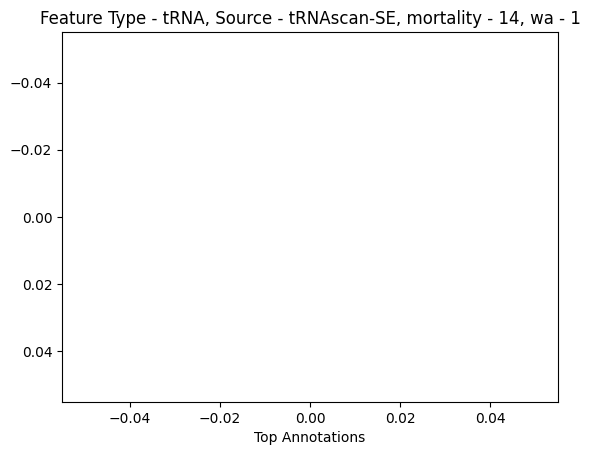

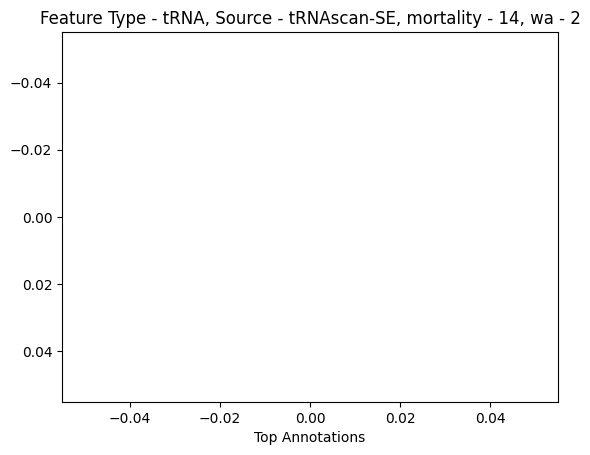

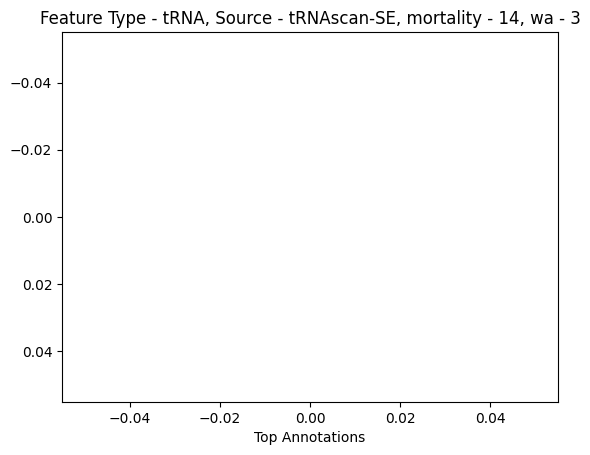

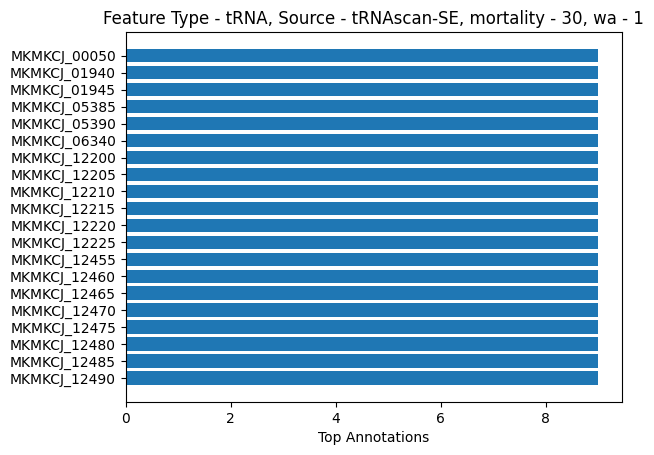

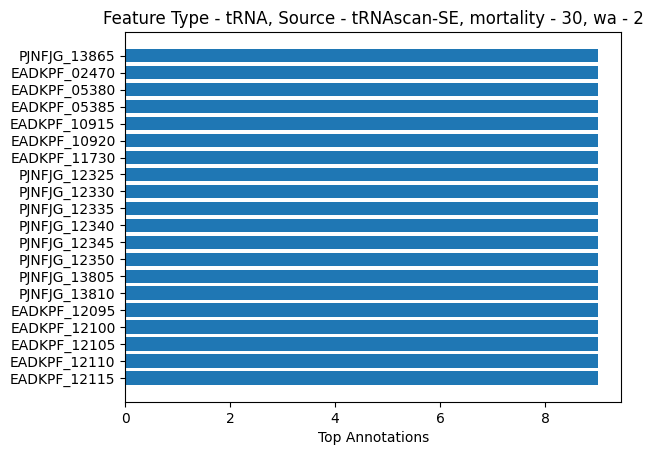

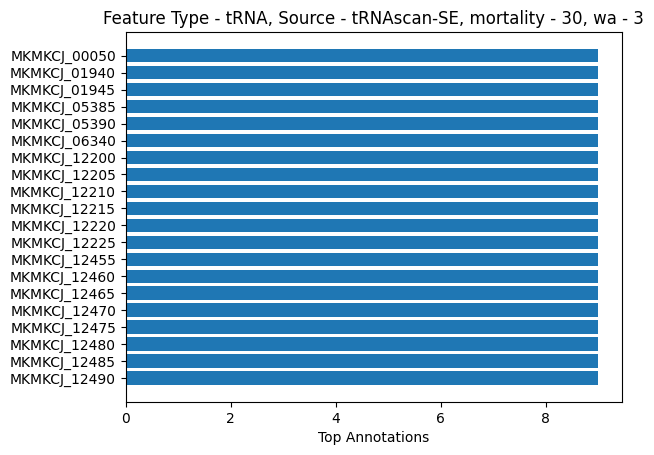

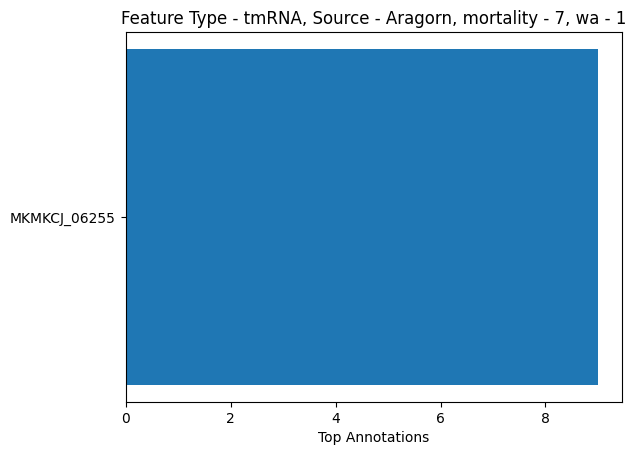

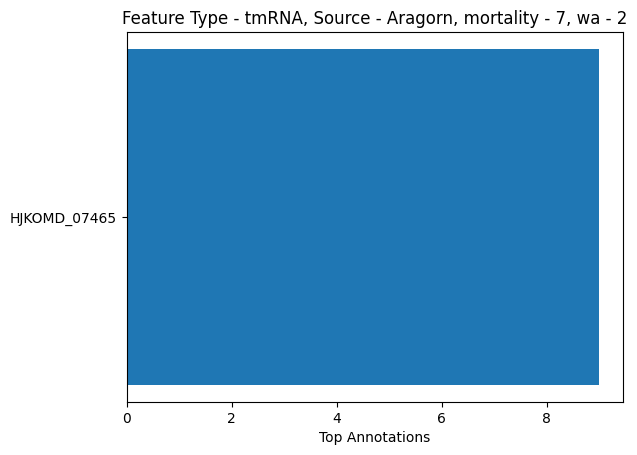

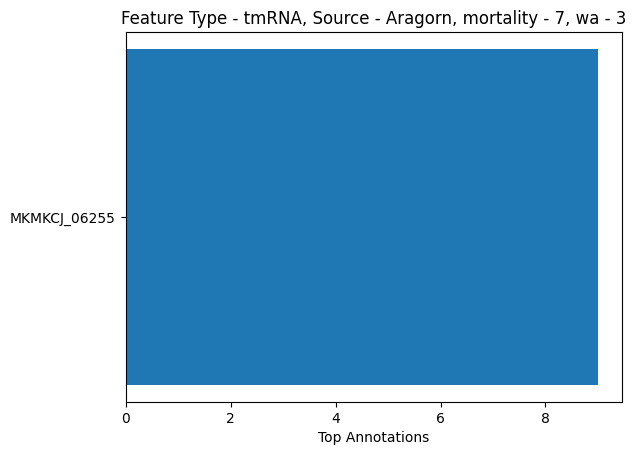

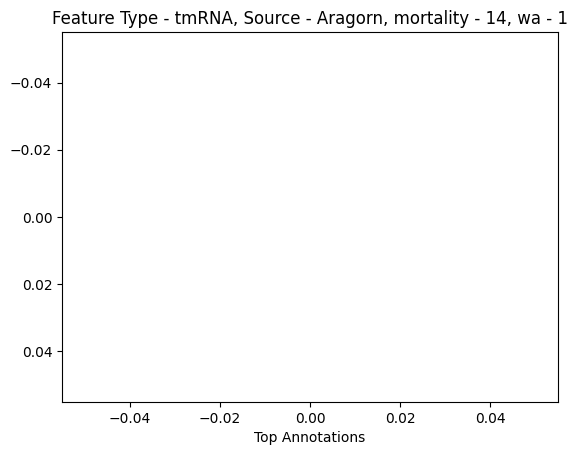

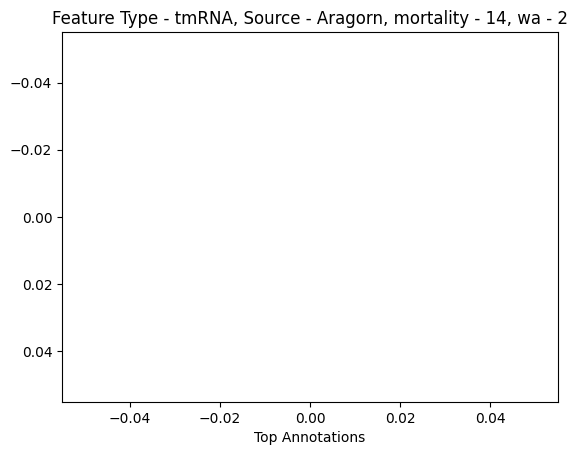

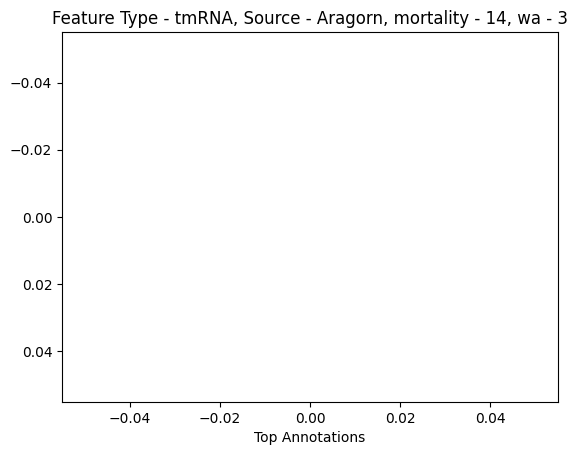

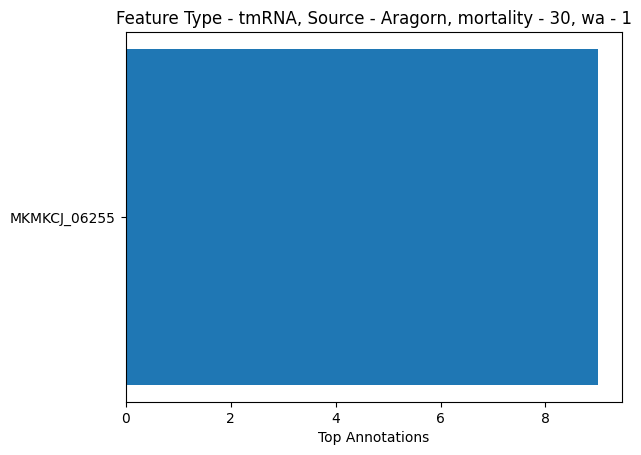

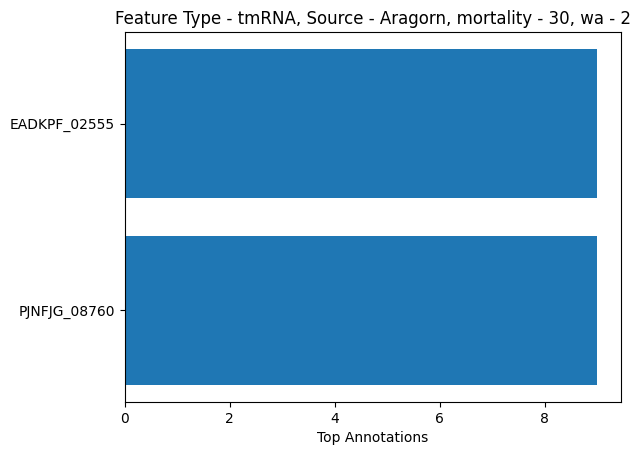

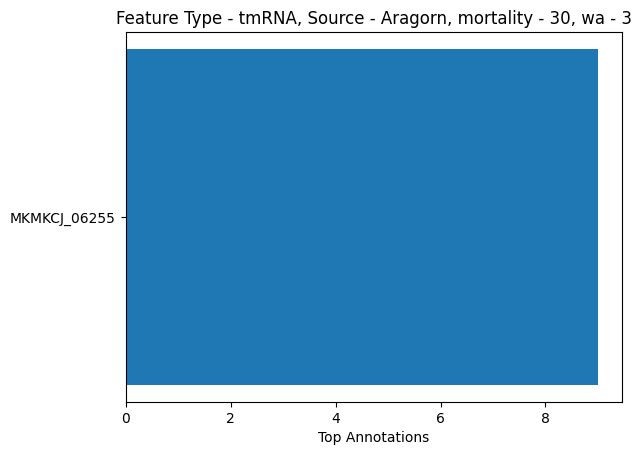

In [81]:
import matplotlib.pyplot as plt


for (featureType, source) in [('CDS', 'Prodigal'), ('CDS', 'Bakta'), ('ncRNA', 'Infernal'), ('oriC', 'BLAST+'), ('oriT', 'BLAST+'), ('rRNA', 'Infernal'), ('regulatory_region', 'Infernal'), ('tRNA', 'tRNAscan-SE'), ('tmRNA', 'Aragorn')]:
    for mortality in [7, 14, 30]:
        for wa in [1, 2, 3]:

            plotDf = finalDf[((finalDf.mortality == mortality) & (finalDf.wa == wa) & (finalDf.feature_type == featureType) & (finalDf.source == source) & (finalDf.preds > 0.8))]

            fig, ax = plt.subplots()

            colName = 'id' if (featureType != 'CDS') else 'gene'

            ax.barh(
                data=plotDf[['sequence_id', colName]].groupby(by=[colName]).agg('count').reset_index().sort_values(by=['sequence_id'], ascending=False)[:20],
                y=colName,
                width='sequence_id',
                align='center'
                )
            # ax.set_yticks(y_pos, labels=people)
            ax.invert_yaxis()  # labels read top-to-bottom
            ax.set_xlabel('Count')
            ax.set_xlabel('Top Annotations')
            ax.set_title('Feature Type - ' + featureType + ', Source - ' + source + ', mortality - ' + str(mortality) + ', wa - ' + str(wa))

            plt.show()

### Plots for showing annotations associated with low risk scores

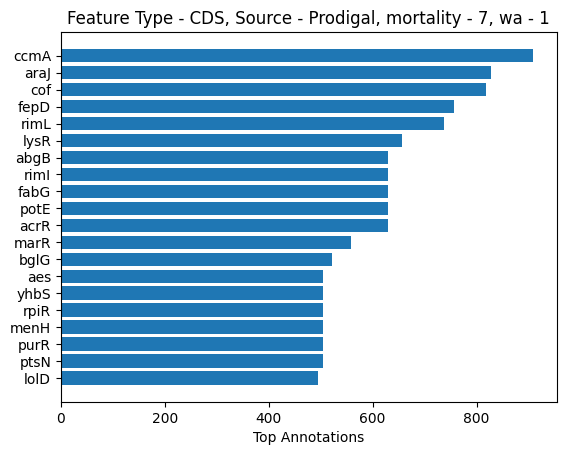

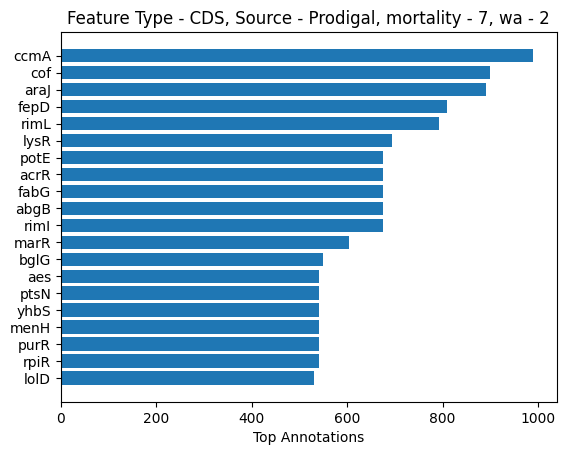

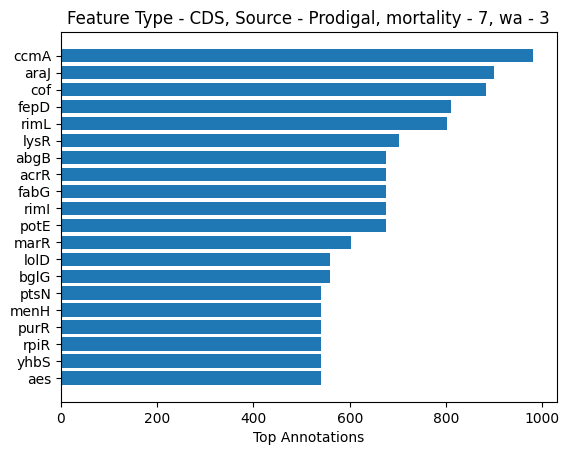

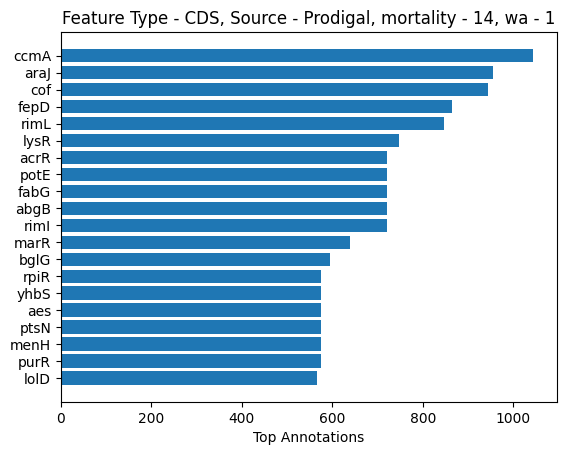

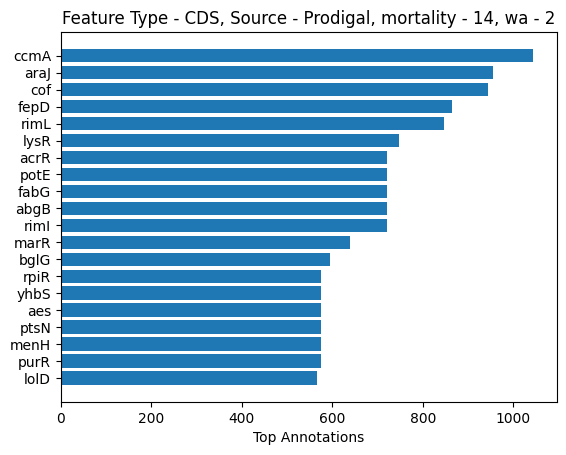

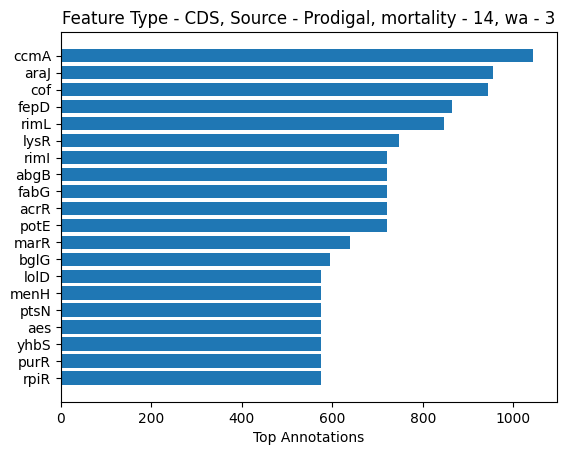

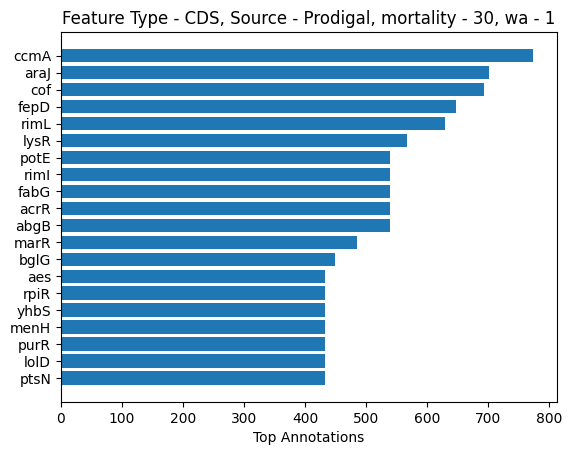

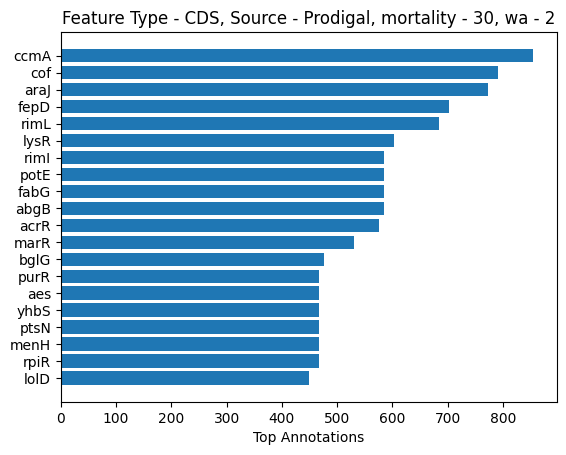

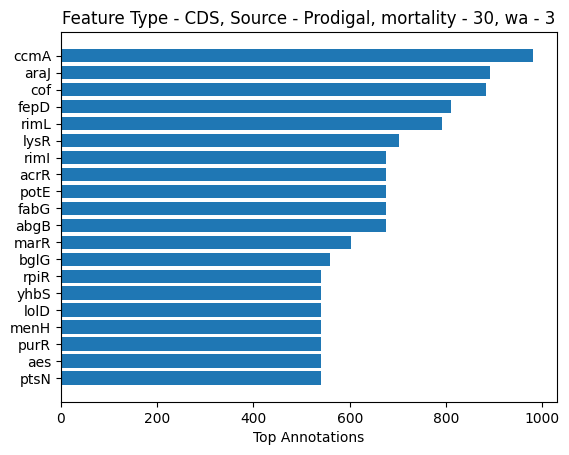

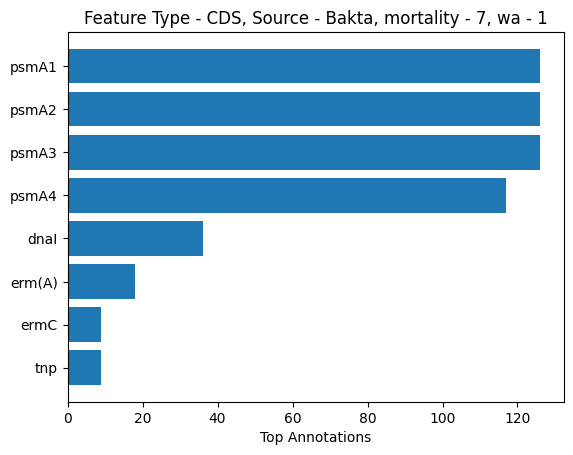

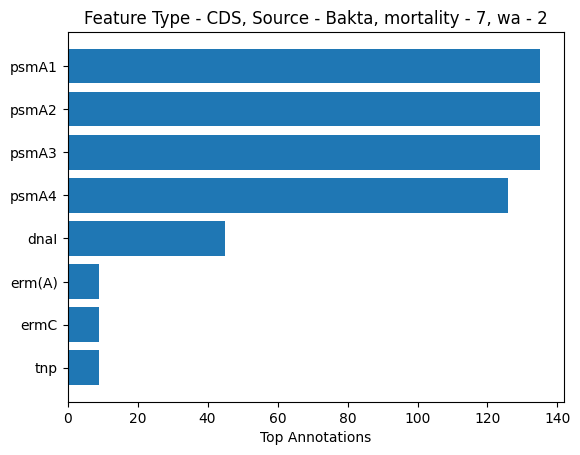

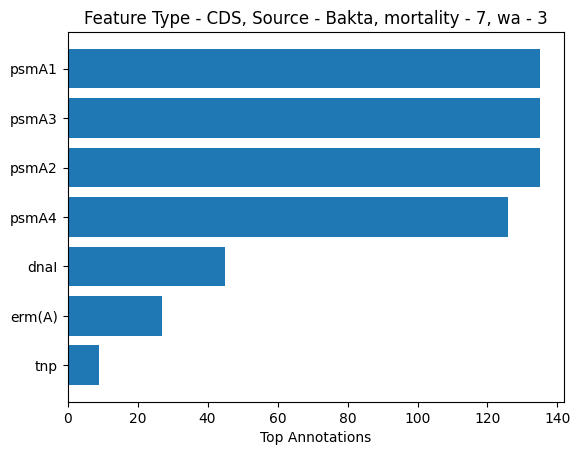

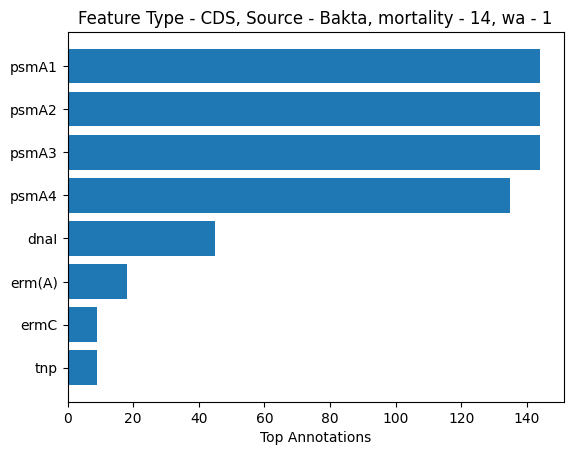

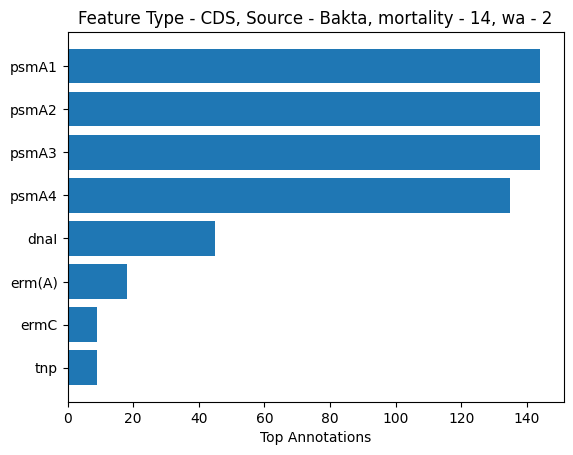

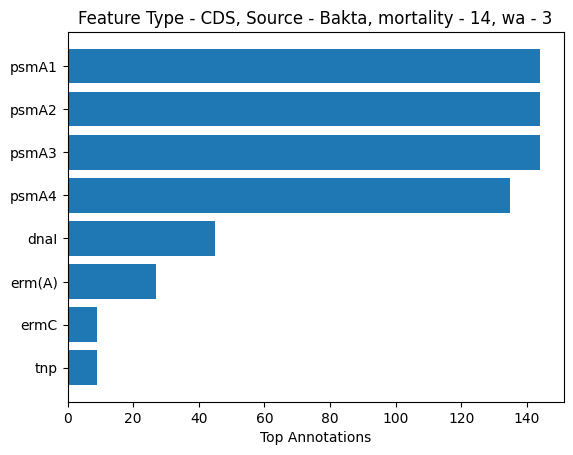

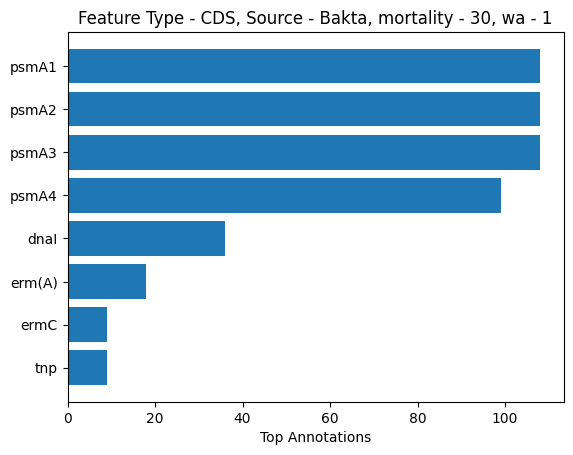

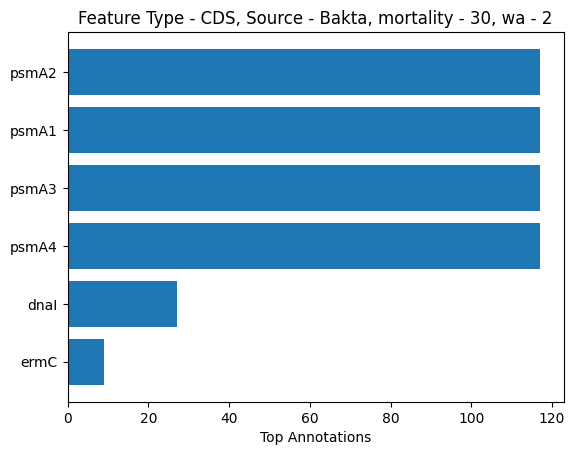

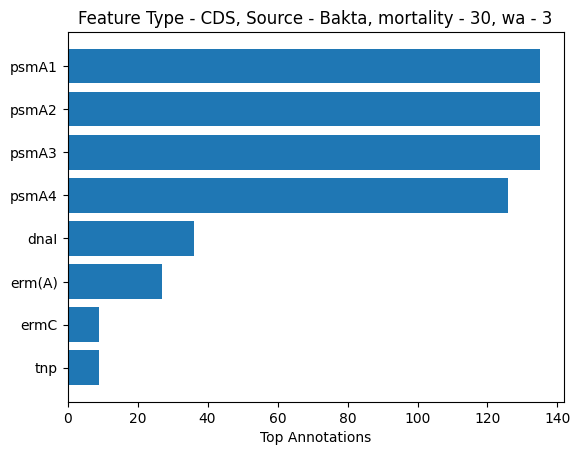

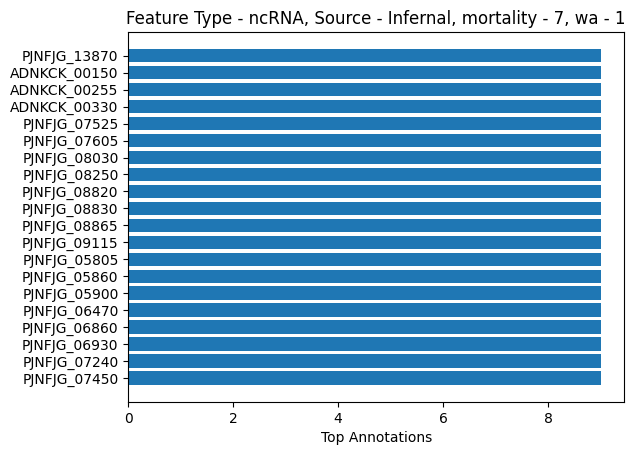

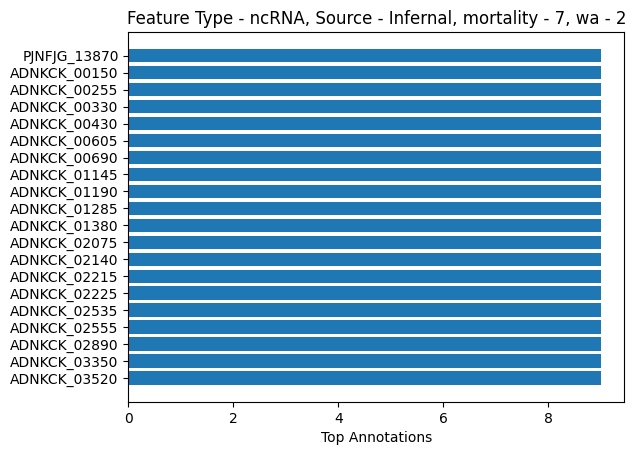

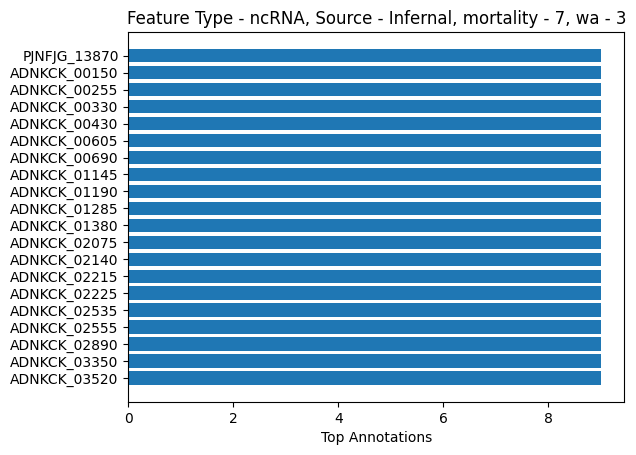

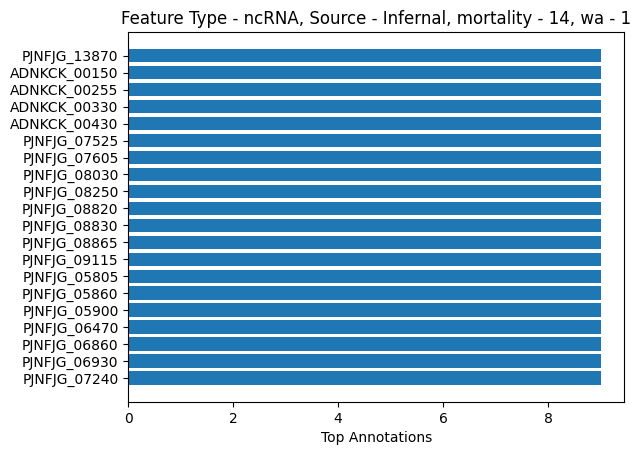

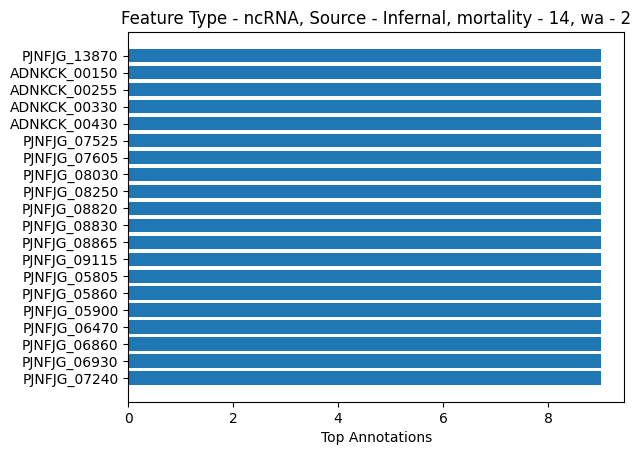

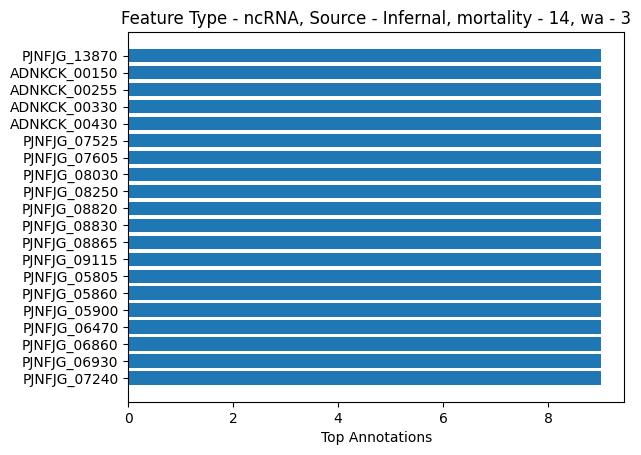

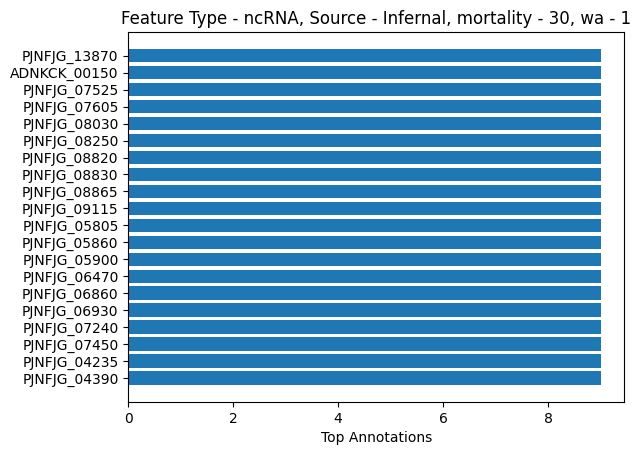

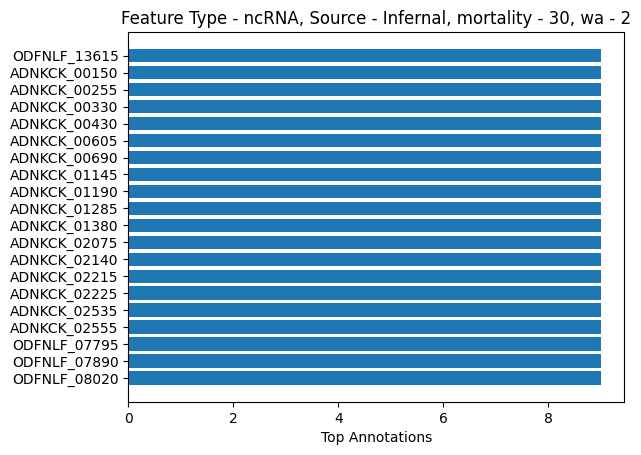

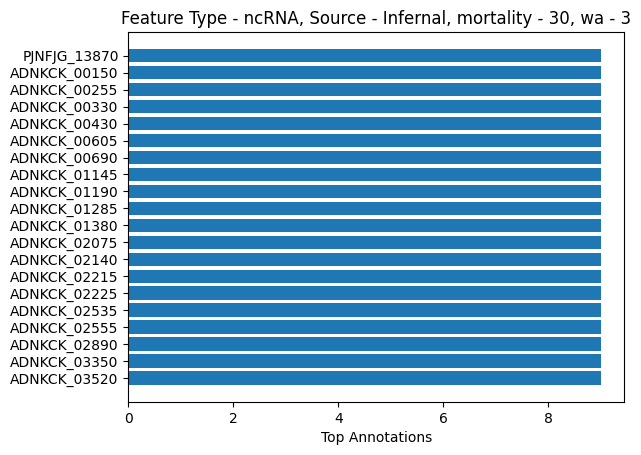

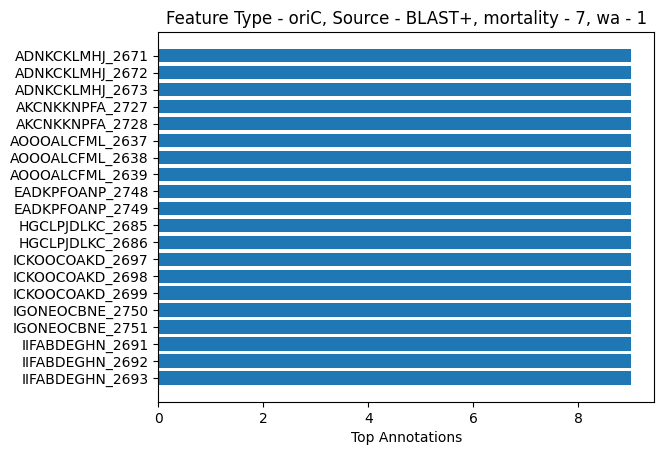

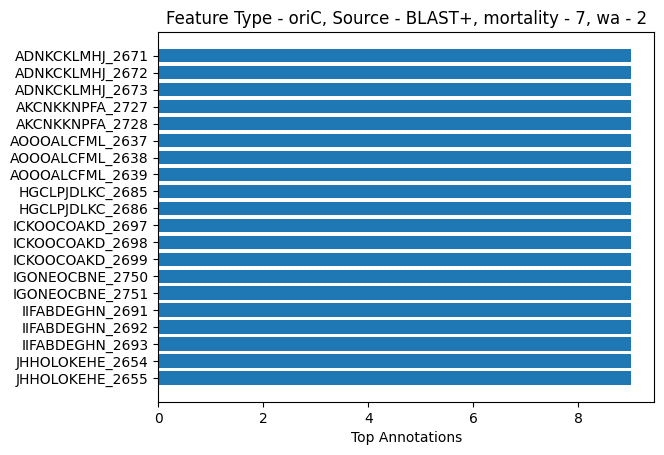

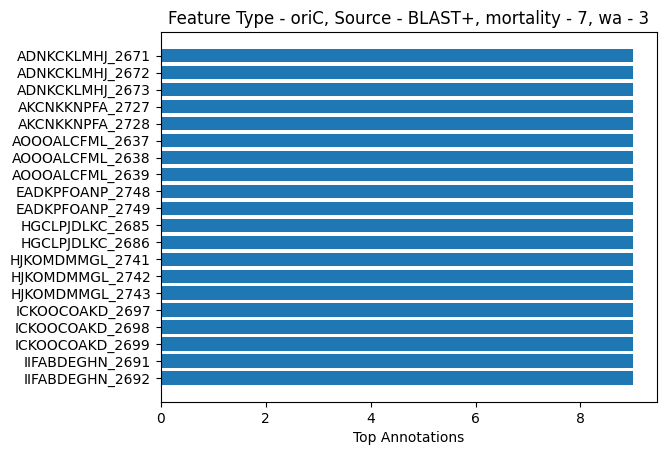

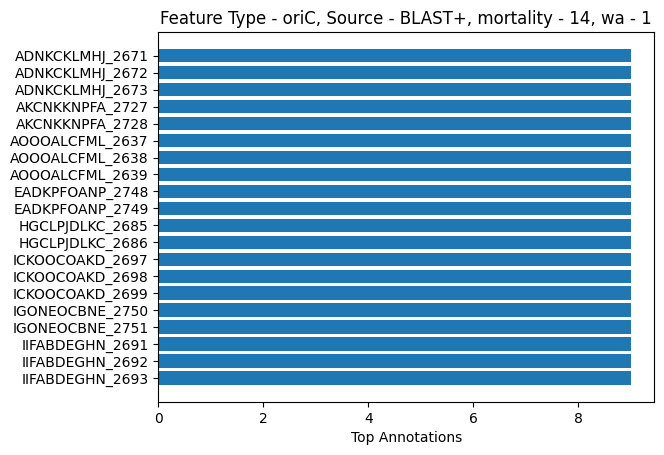

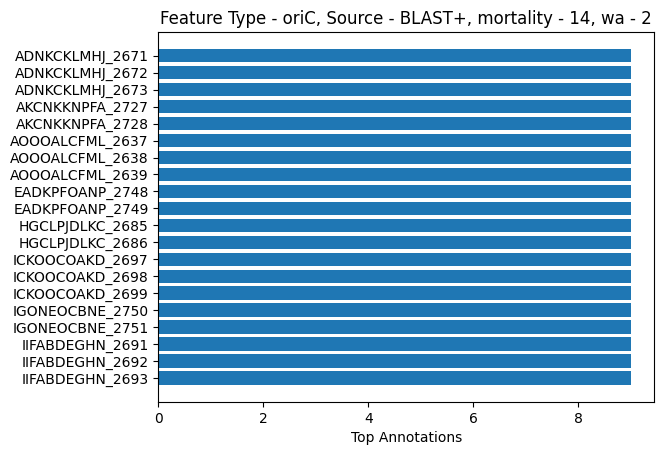

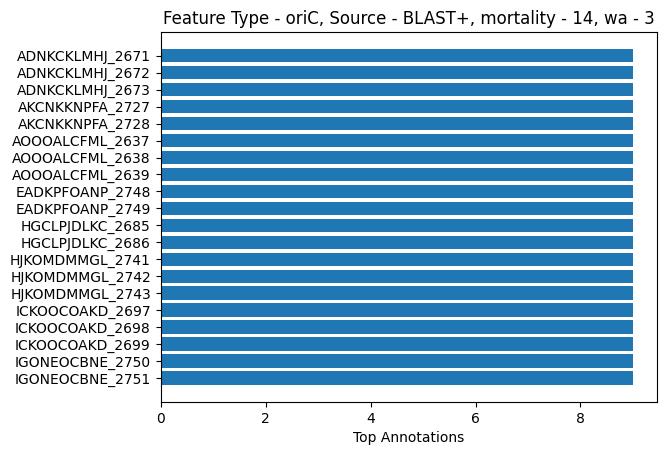

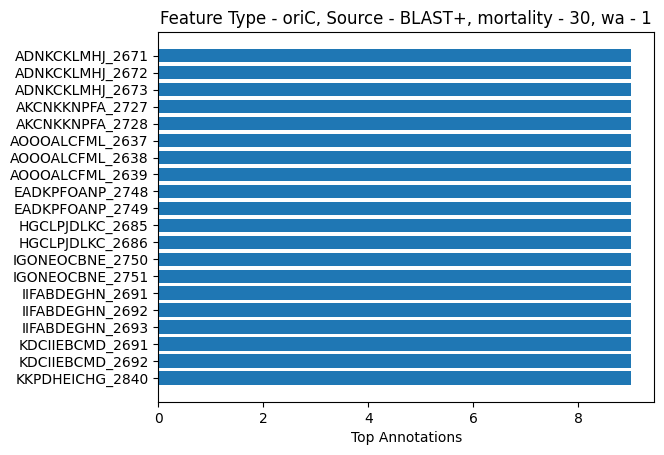

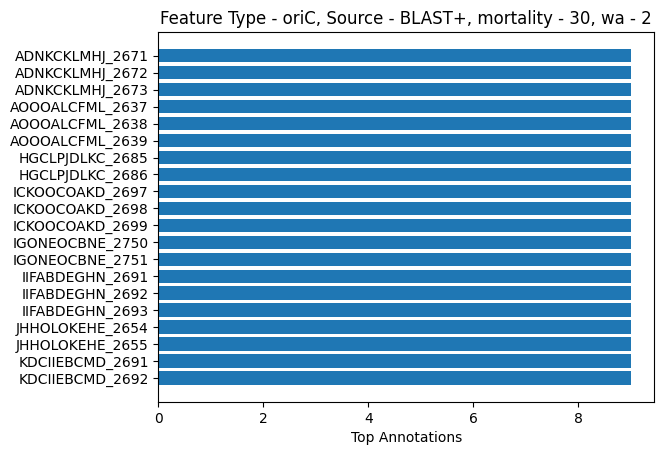

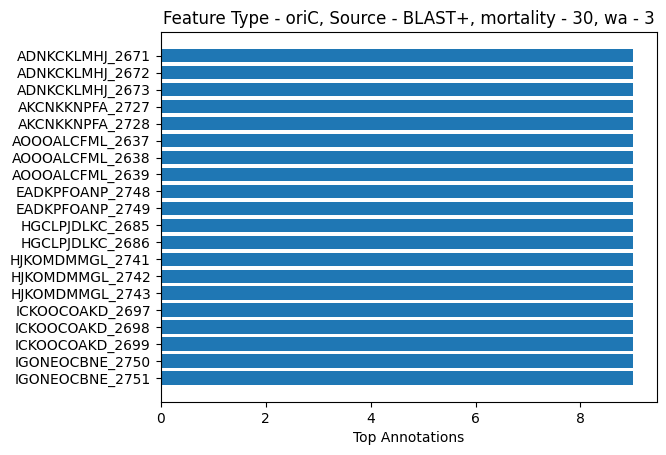

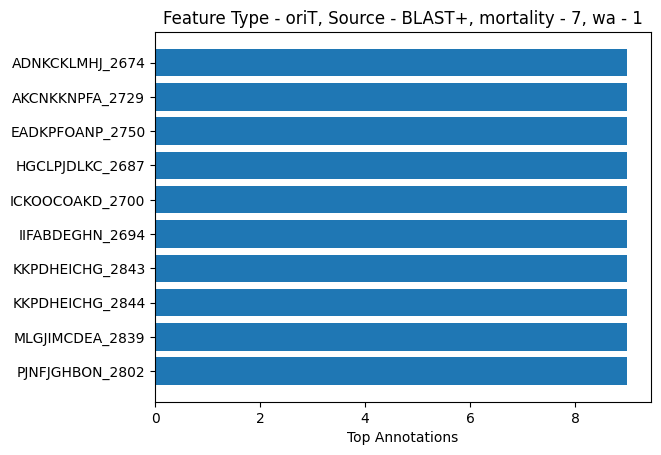

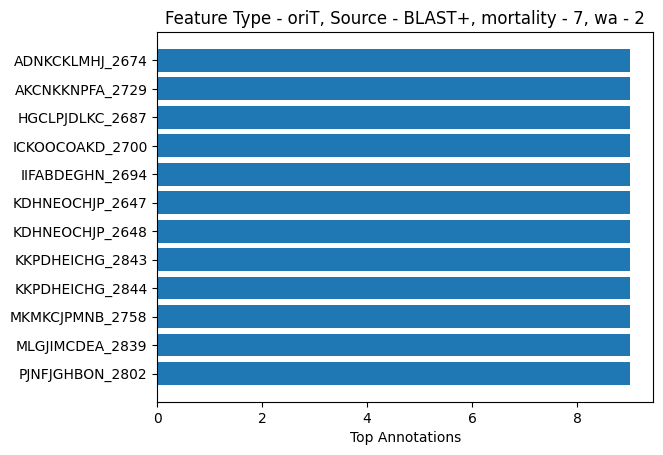

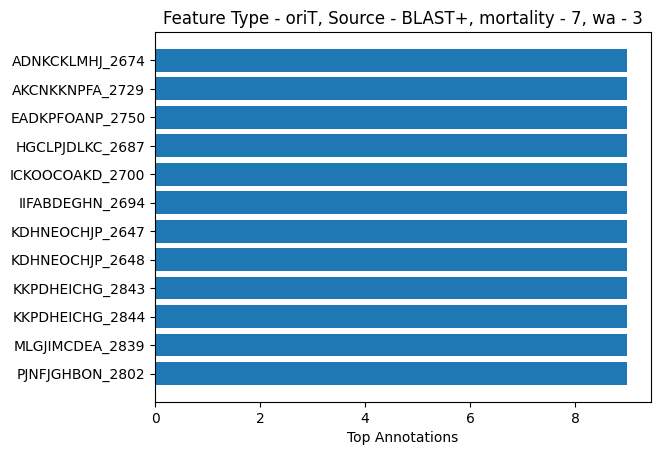

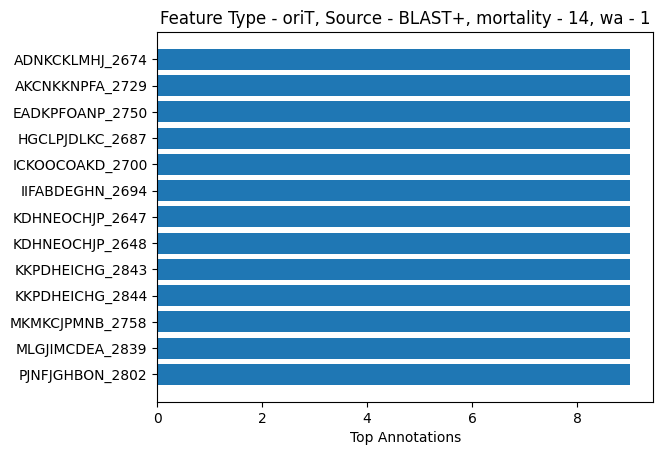

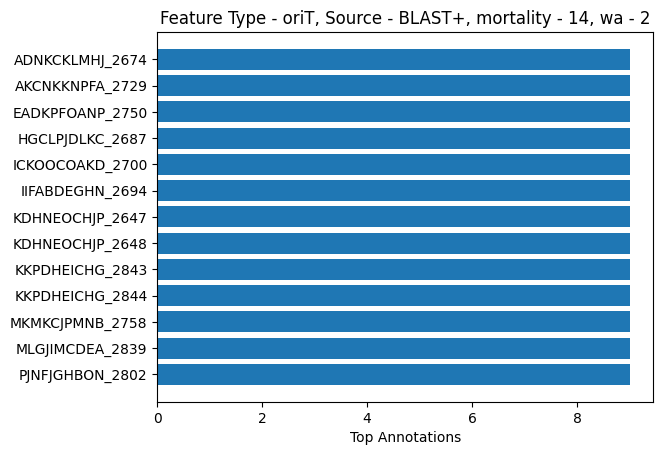

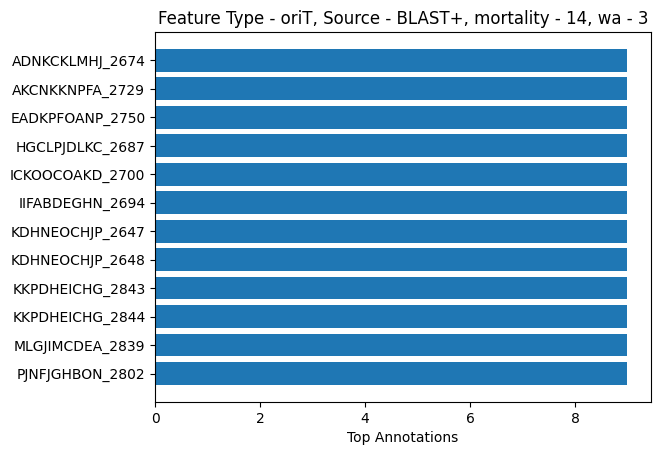

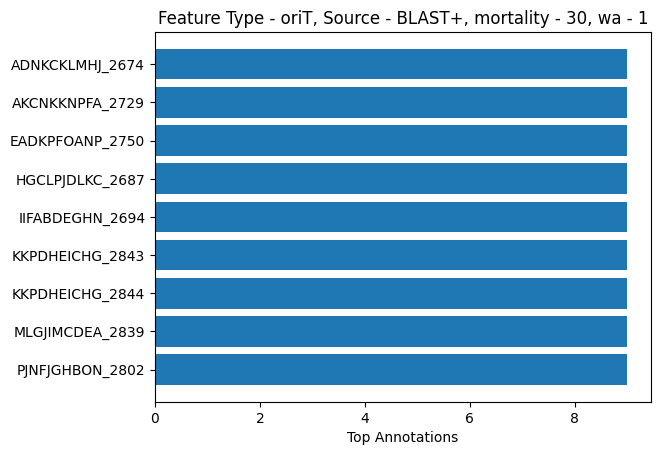

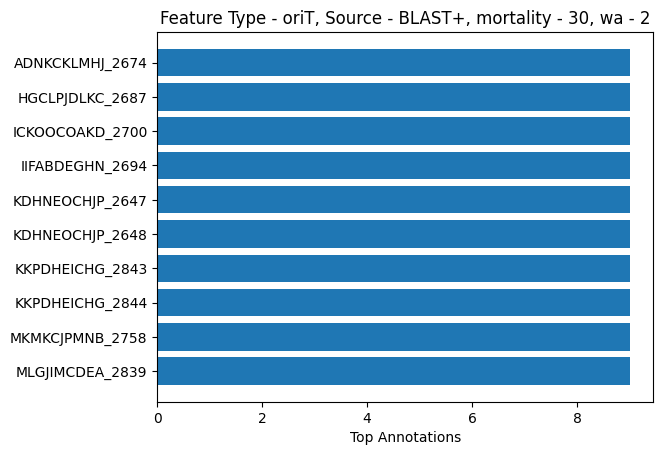

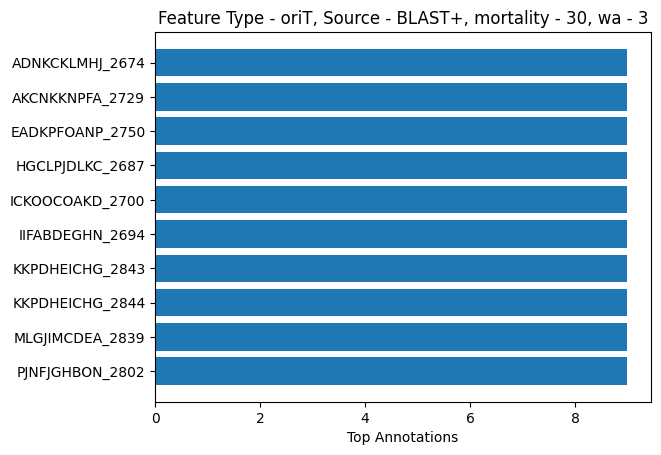

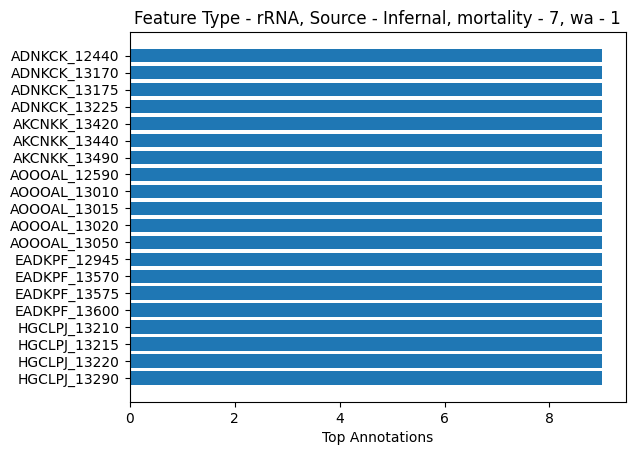

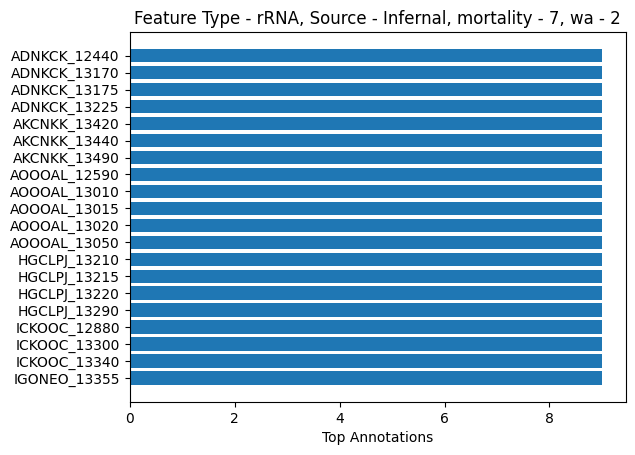

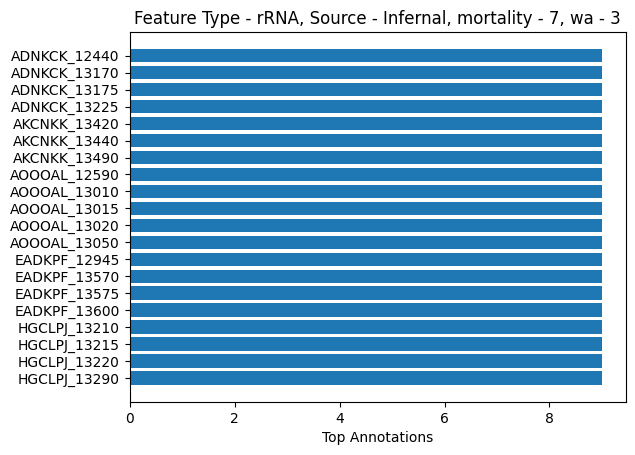

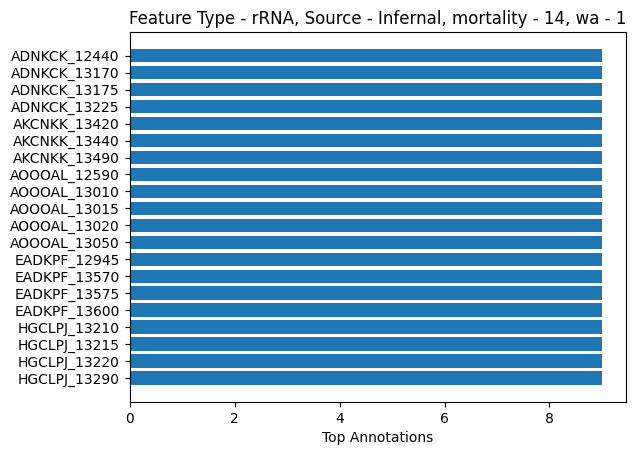

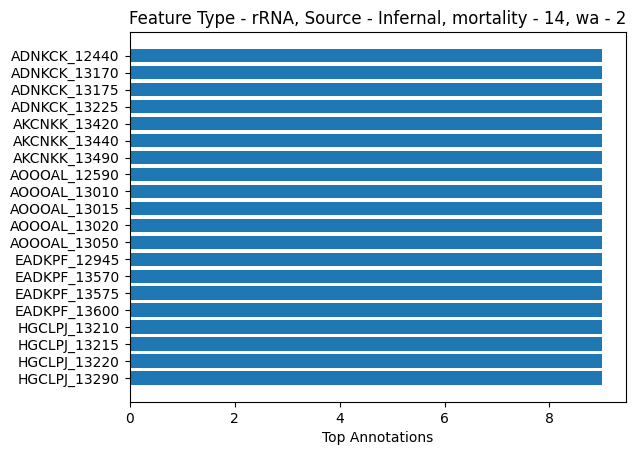

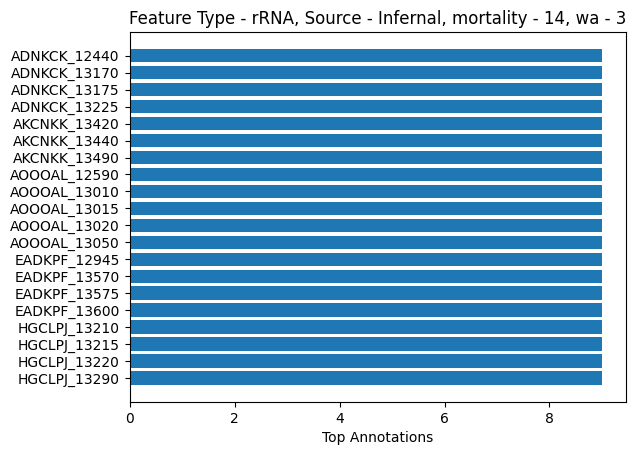

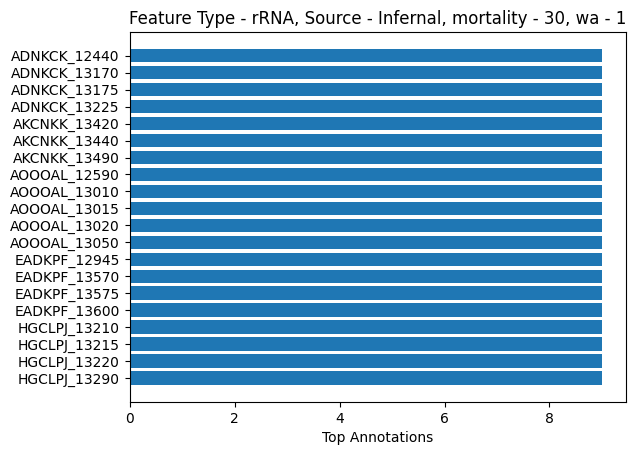

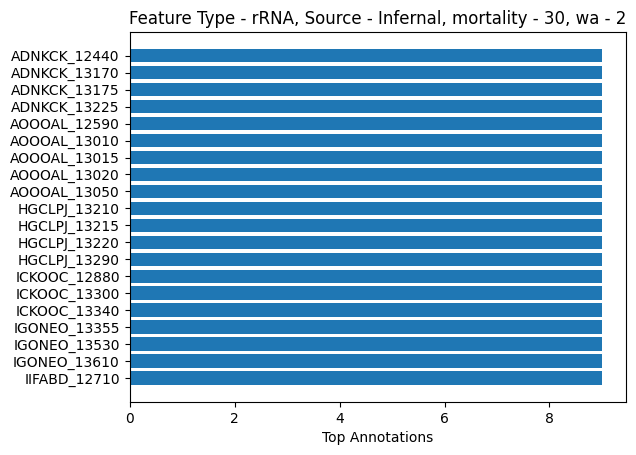

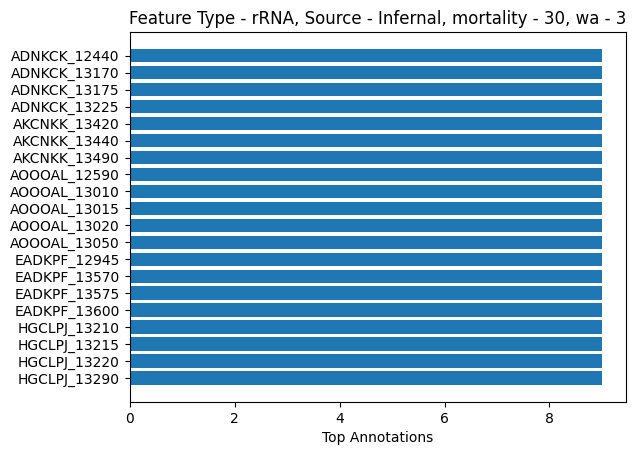

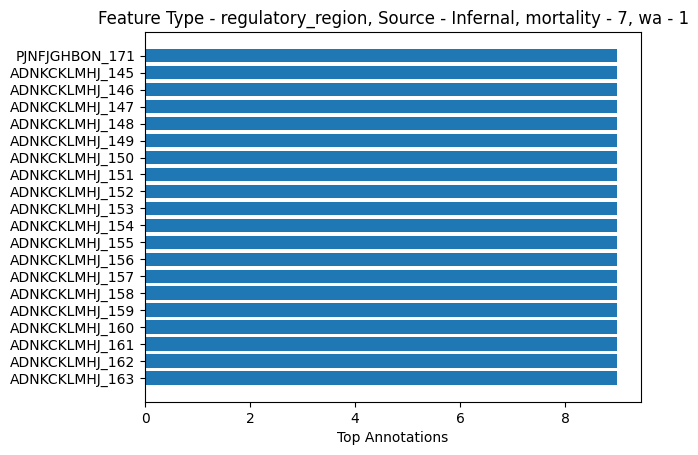

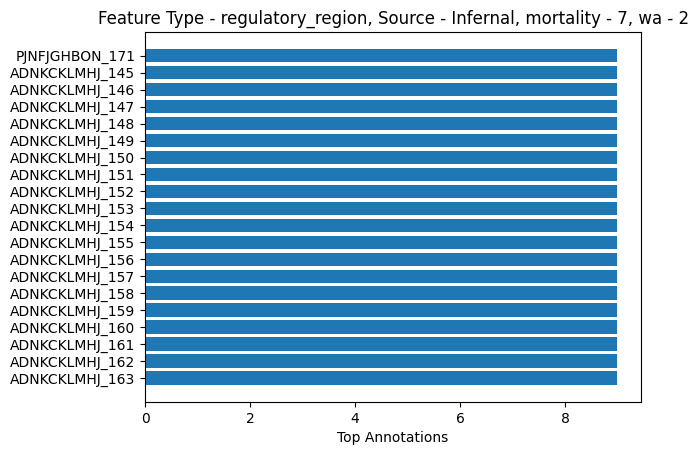

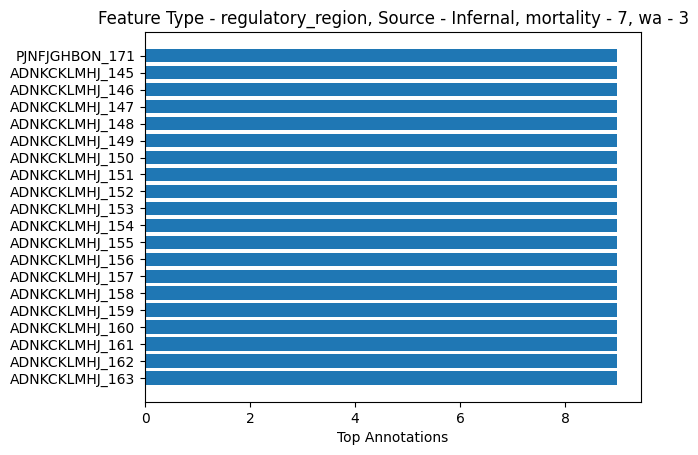

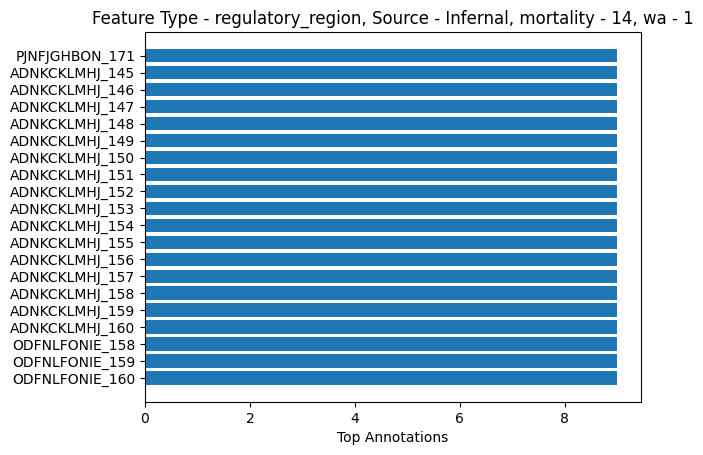

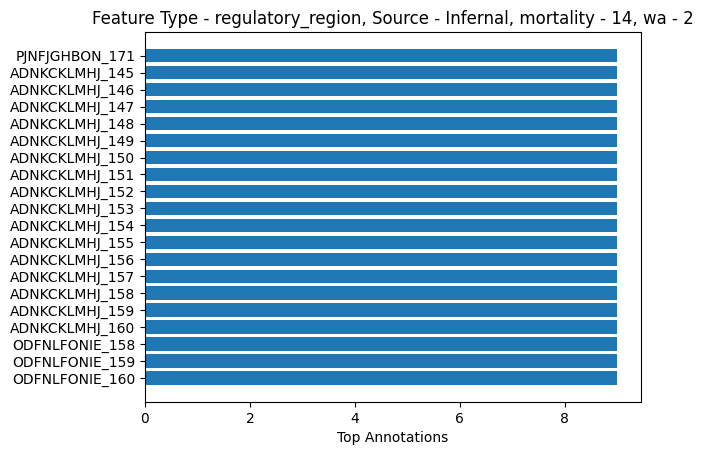

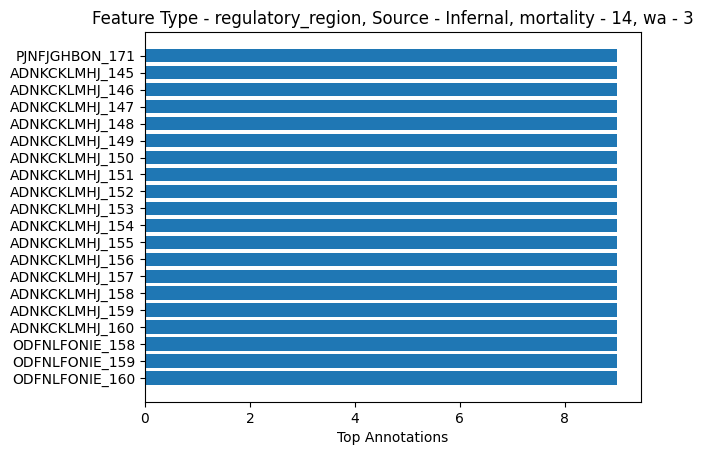

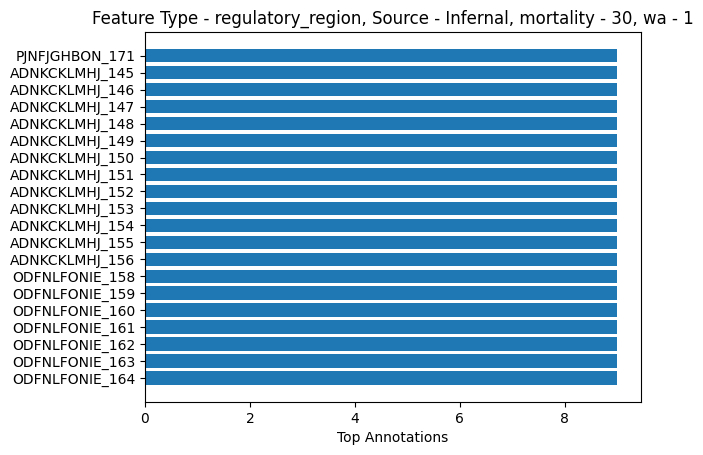

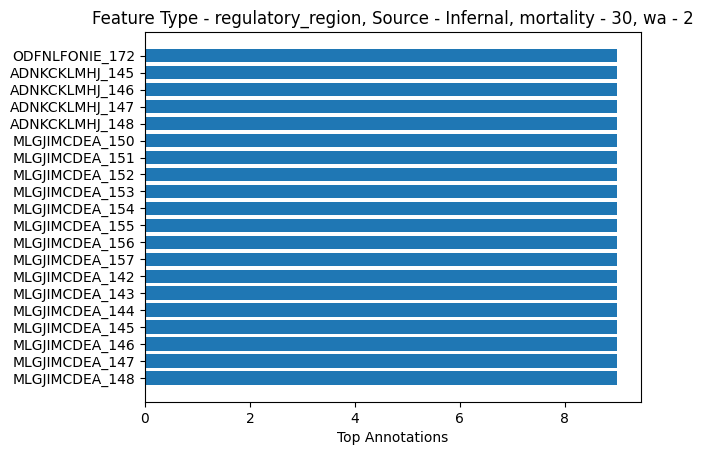

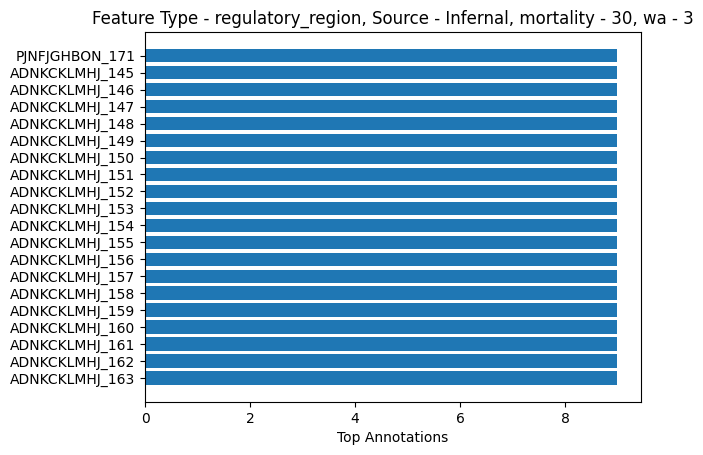

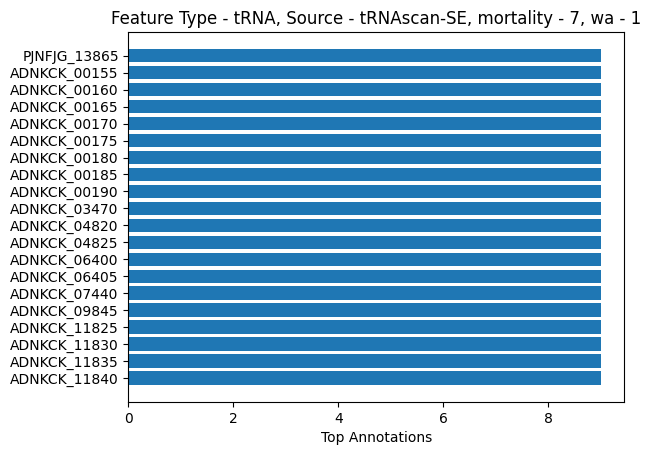

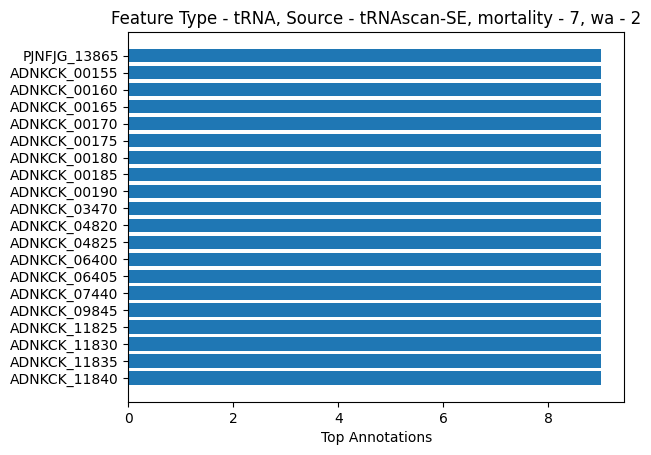

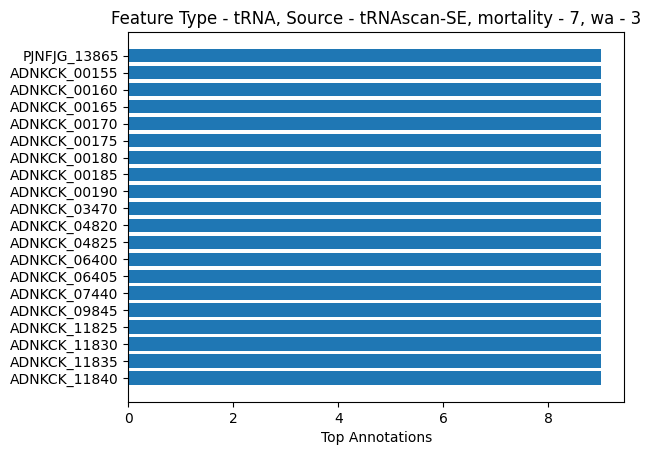

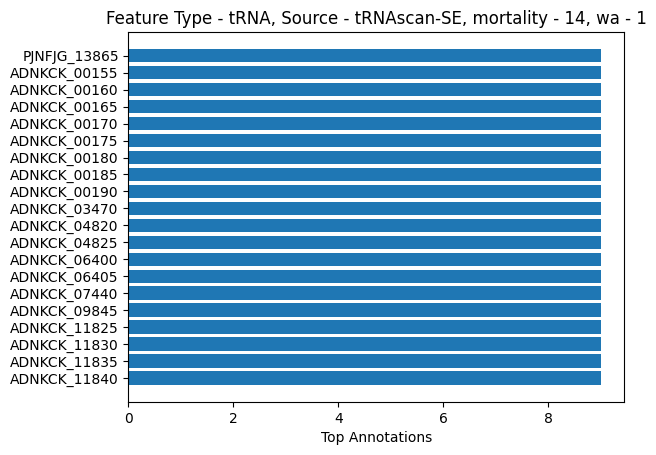

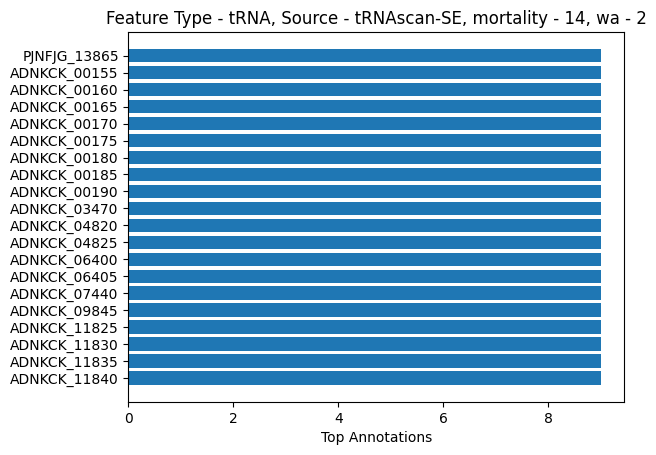

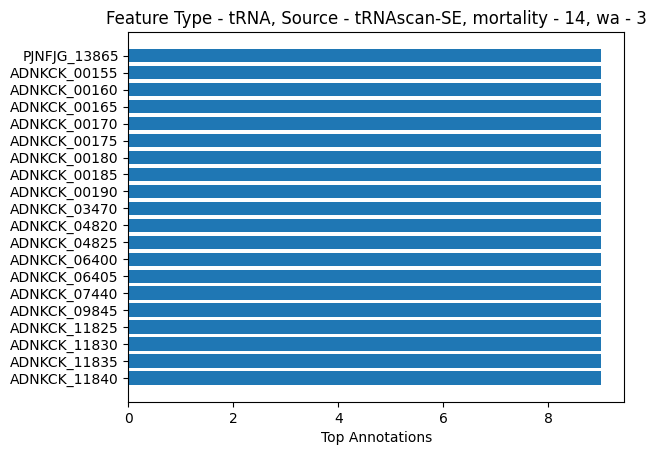

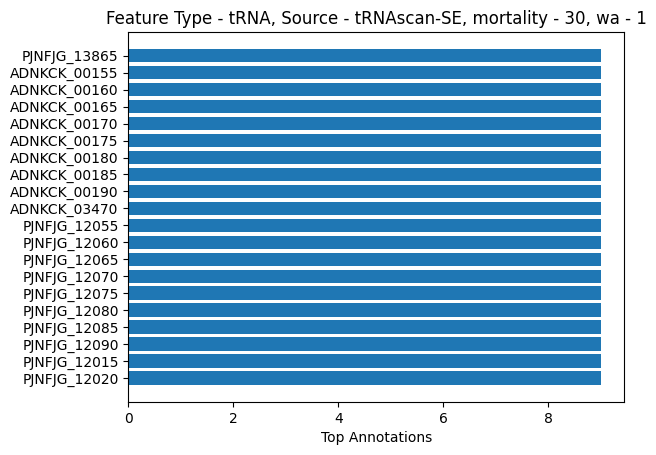

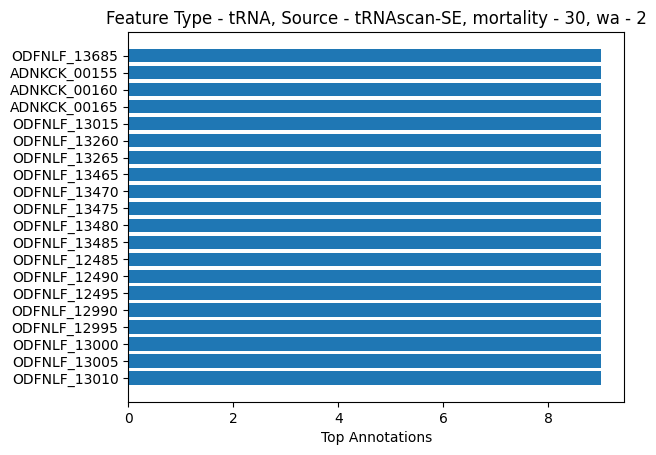

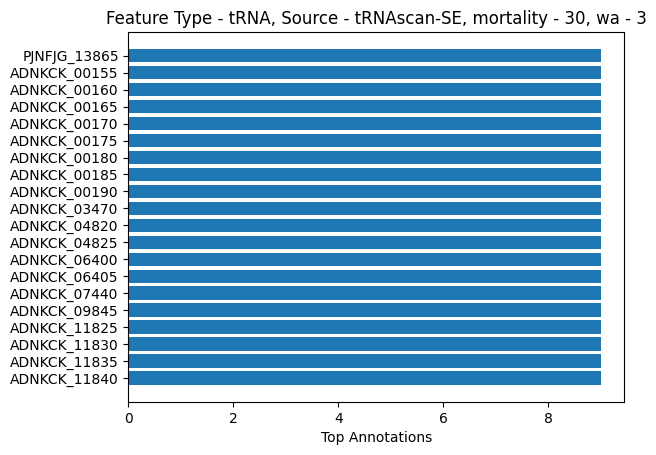

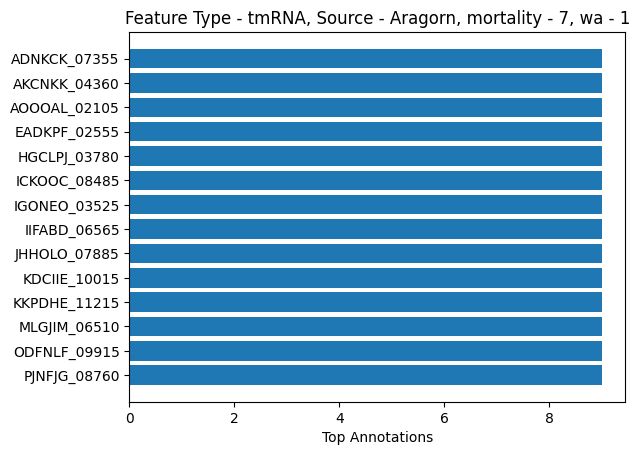

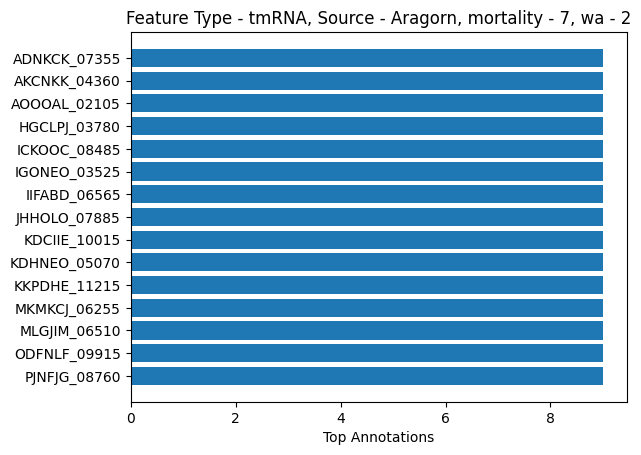

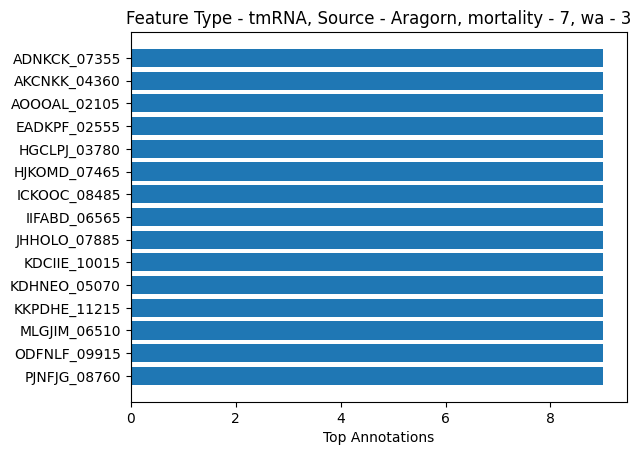

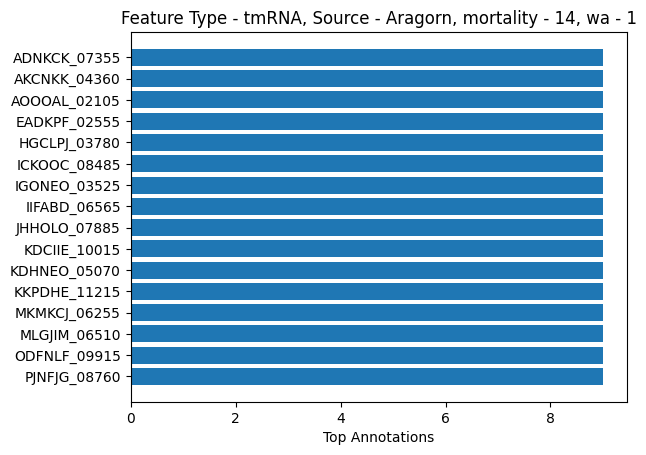

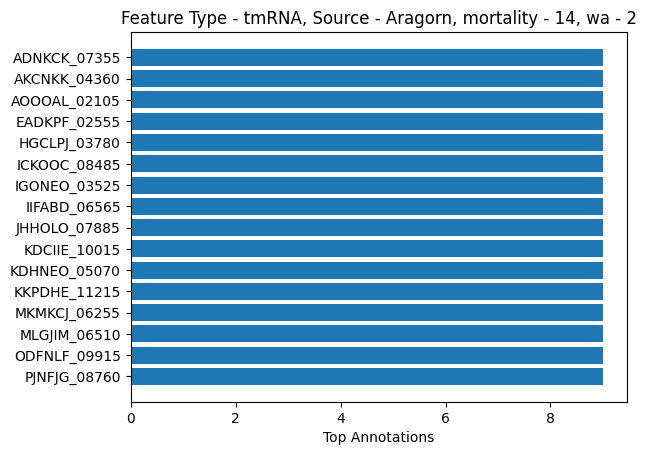

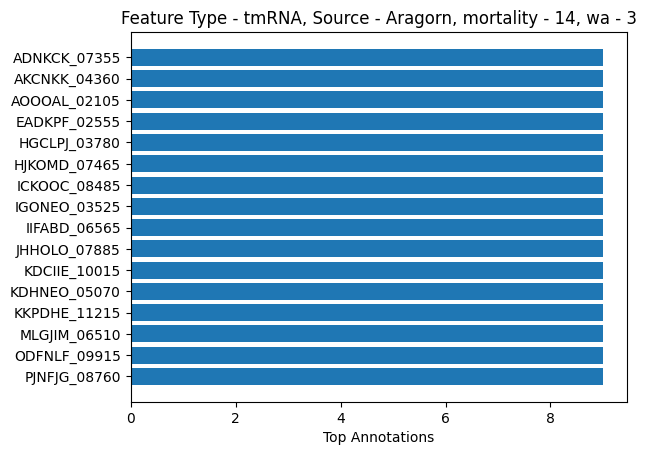

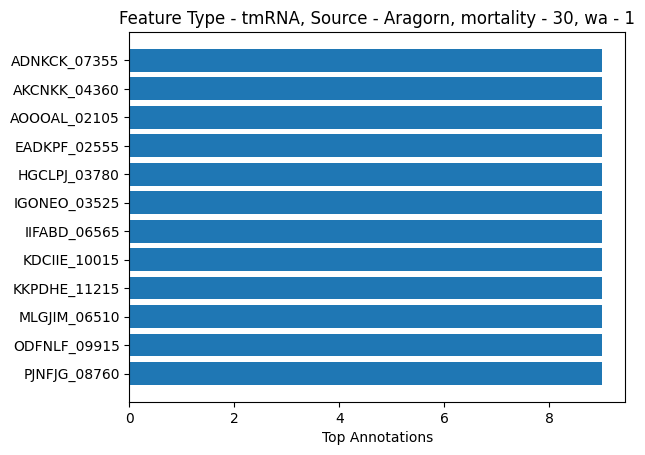

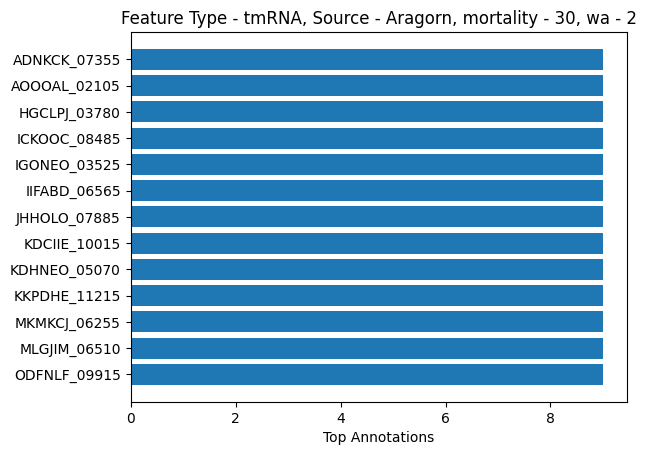

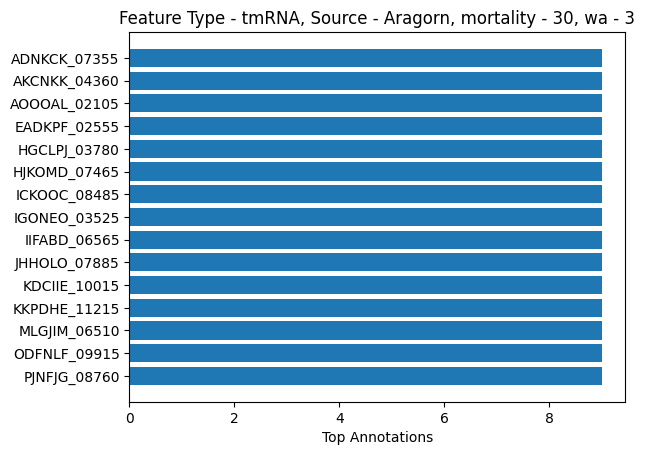

In [82]:
import matplotlib.pyplot as plt


for (featureType, source) in [('CDS', 'Prodigal'), ('CDS', 'Bakta'), ('ncRNA', 'Infernal'), ('oriC', 'BLAST+'), ('oriT', 'BLAST+'), ('rRNA', 'Infernal'), ('regulatory_region', 'Infernal'), ('tRNA', 'tRNAscan-SE'), ('tmRNA', 'Aragorn')]:
    for mortality in [7, 14, 30]:
        for wa in [1, 2, 3]:

            plotDf = finalDf[((finalDf.mortality == mortality) & (finalDf.wa == wa) & (finalDf.feature_type == featureType) & (finalDf.source == source) & (finalDf.preds < 0.2))]

            fig, ax = plt.subplots()

            colName = 'id' if (featureType != 'CDS') else 'gene'

            ax.barh(
                data=plotDf[['sequence_id', colName]].groupby(by=[colName]).agg('count').reset_index().sort_values(by=['sequence_id'], ascending=False)[:20],
                y=colName,
                width='sequence_id',
                align='center'
                )
            # ax.set_yticks(y_pos, labels=people)
            ax.invert_yaxis()  # labels read top-to-bottom
            ax.set_xlabel('Count')
            ax.set_xlabel('Top Annotations')
            ax.set_title('Feature Type - ' + featureType + ', Source - ' + source + ', mortality - ' + str(mortality) + ', wa - ' + str(wa))

            plt.show()